# <span style="color:#0b486b">  FIT3181: Deep Learning (2022)</span>
***
*CE/Lecturer:* Dr **Trung Le** | trunglm@monash.edu <br/>
*Head Tutor:* Mr **Thanh Nguyen** | thanh.nguyen4@monash.edu  <br/>
<br/>
Department of Data Science and AI, Faculty of Information Technology, Monash University, Australia
***

# <span style="color:#0b486b">  Student Information</span>
***
Surname: **Lee**  <br/>
Firstname: **Jian Hui**    <br/>
Student ID: **32116314**    <br/>
Email: **jlee0235@student.monash.edu**    <br/>
Your tutorial time: **Friday 2 to 4 pm**    <br/>
***


$$
    \theta
$$

# <span style="color:#0b486b">Deep Neural Networks</span>
### Due: <span style="color:red">11:59pm Sunday, 18 September 2022</span>  (Sunday)

#### <span style="color:red">Important note:</span> This is an **individual** assignment. It contributes **20%** to your final mark. Read the assignment instruction carefully.

## <span style="color:#0b486b">Instruction</span>

This notebook has been prepared for your to complete Assignment 1. The theme of this assignment is about practical machine learning knowledge and skills in deep neural networks, including feedforward and convolutional neural networks. Some sections have been partially completed to help you get
started. **The total marks for this notebook is 100**.

* Before you start, read the entire notebook carefully once to understand what you need to do. <br/>

* For each cell marked with **#YOU ARE REQUIRED TO INSERT YOUR CODES IN THIS CELL**, there will be places where you **must** supply your own codes when instructed. <br>

This assignment contains **three** parts:

* Part 1: Questions on theory and knowledge on machine learning and deep learning **[30 points], 30%**
* Part 2: Coding assessment on TensorFlow for Deep Neural Networks (DNN) **[30 points], 30%**
* Part 3: Coding assessment on TensorFlow for Convolution Neural Networks (CNN) **[40 points], 40%**

**Hint**: This assignment was essentially designed based on the lectures and tutorials sessions covered from Week 1 to Week 6. You are strongly recommended to go through these contents thoroughly which might help you to complete this assignment.

## <span style="color:#0b486b">What to submit</span>

This assignment is to be completed individually and submitted to Moodle unit site. **By the due date, you are required to submit one  <span style="color:red; font-weight:bold">single zip file, named xxx_assignment01_solution.zip</span> where `xxx` is your student ID, to the corresponding Assignment (Dropbox) in Moodle**. 

***For example, if your student ID is <span style="color:red; font-weight:bold">12356</span>, then gather all of your assignment solution to folder, create a zip file named <span style="color:red; font-weight:bold">123456_assignment01_solution.zip</span> and submit this file.***

Within this zip folder, you **must** submit the following files:
1.	**Assignment01_solution.ipynb**:  this is your Python notebook solution source file.
1.	**Assignment01_output.html**: this is the output of your Python notebook solution *exported* in html format.
1.	Any **extra files or folder** needed to complete your assignment (e.g., images used in your answers).

Since the notebook is quite big to load and work together, one recommended option is to split solution into three parts and work on them seperately. In that case, replace **Assignment01_solution.ipynb** by three notebooks: **Assignment01_Part1_solution.ipynb**, **Assignment01_Part2_solution.ipynb** and **Assignment01_Part3_solution.ipynb**

**You can run your codes on Google Colab. In this case, you need to capture the screenshots of your Google Colab model training and put in corresponding places in your Jupyter notebook. You also need to store your trained models to folder <span style="color:red; font-weight:bold">*./models*</span> with recognizable file names (e.g., Part3_Sec3_2_model.h5).** 

### LIBRARY IMPORTS & CONSTANTS


In [2]:
import numpy as np
import pandas as pd

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import datasets, models, layers
from tensorflow.keras.callbacks import ModelCheckpoint

import matplotlib.pyplot as plt
import math
%matplotlib inline

MY_SEED = 1234


## <span style="color:#0b486b">Part 1: Theory and Knowledge Questions</span>
<div style="text-align: right"><span style="color:red; font-weight:bold">[Total marks for this part: 30 points]<span></div>

The first part of this assignment is for you to demonstrate your knowledge in deep learning that you have acquired from the lectures and tutorials materials. Most of the contents in this assignment are drawn from **the lectures and tutorials from weeks 1 to 3**. Going through these materials before attempting this part is highly recommended.

####  <span style="color:red">**Question 1.1**</span> **Activation function plays an important role in modern Deep NNs. For each of the activation function below, state its output range, find its derivative (show your steps), and plot the activation fuction and its derivative**

<span style="color:red">**(a)**</span> Leaky ReLU: 
$
\text{LeakyReLU}\left( x \right)=
\begin{cases}
    0.01x & \text{if}\,x<0\\
    x & \text{otherwise}
\end{cases}\
$ 
<div style="text-align: right"><span style="color:red">[1.5 points]</span></div> 

<span style="color:red">**(b)**</span> Softplus: $\text{Softplus}\left(x\right)=\text{ln}\left(1+e^{x}\right)$
<div style="text-align: right"><span style="color:red">[1.5 points]</span></div> 

---
#### NOTE: i understand that gradient tape can be used here, but i didnt want to increase the complexity of an easy problem.

##### leaky ReLu:
- output range: $ - \infty \leq x \leq + \infty$
- derivative:
just have to derive for both separate ranges $ x < 0 $ and $ x \geq 0 $
$$
x = \begin{cases}
   0.01 &\text{if } x < 0 \\
   1 &\text{otherwise } x \geq 0
\end{cases}
$$

##### Softplus: 
- output range: $ 0 \leq x \leq + \infty $
- derivative:

$$
\begin{align*}
softplus'(x) & = \dfrac {1}{1 + e^x} (\dfrac {\partial}{\partial x} (1 + e^x)) \\
& = \dfrac {e^x}{1 + e^x} 
\end{align*}
$$


### Plots for LeakyReLU and Softplus


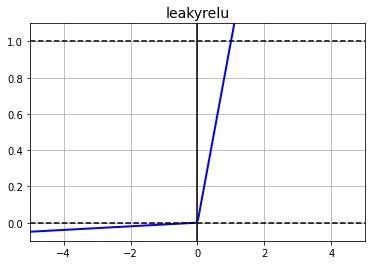

In [3]:
def leakyrelu(x):
    if x < 0:
        return 0.01*x
    else:
        return x


x = np.linspace(-5, 5, 200)

y = []
for i in range(len(x)):
    y.append(leakyrelu(x[i]))

plt.plot(x, y, "b-", linewidth=2)
plt.plot([-5, 5], [0, 0], 'k--')
plt.plot([-5, 5], [1, 1], 'k--')
plt.plot([0, 0], [-5, 5], 'k-')
plt.grid(True)
plt.title(r"leakyrelu", fontsize=14)
plt.axis([-5, 5, -0.1, 1.1])
plt.show()


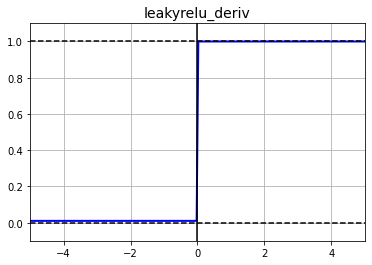

In [4]:
def leakyrelu_deriv(x):
    return 0.01 if x < 0 else 1

x = np.linspace(-5, 5, 200)

y = []
for i in range(len(x)):
    y.append(leakyrelu_deriv(x[i]))

plt.plot(x, y, "b-", linewidth=2)
plt.plot([-5, 5], [0, 0], 'k--')
plt.plot([-5, 5], [1, 1], 'k--')
plt.plot([0, 0], [-5, 5], 'k-')
plt.grid(True)
plt.title(r"leakyrelu_deriv", fontsize=14)
plt.axis([-5, 5, -0.1, 1.1])
plt.show()

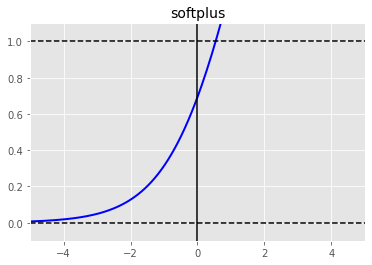

In [159]:
def softplus(x):
    # ln(1 + e^x)
    return math.log(1 + math.e ** x)

x = np.linspace(-5, 5, 200)

y = []
for i in range(len(x)):
    y.append(softplus(x[i]))

plt.plot(x, y, "b-", linewidth=2)
plt.plot([-5, 5], [0, 0], 'k--')
plt.plot([-5, 5], [1, 1], 'k--')
plt.plot([0, 0], [-5, 5], 'k-')
plt.grid(True)
plt.title(r"softplus", fontsize=14)
plt.axis([-5, 5, -0.1, 1.1])
plt.show()

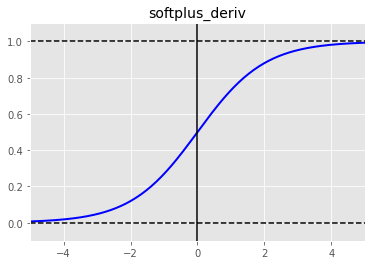

In [160]:
def softplus_deriv(x):
    # e^x / (1 + e^x)
    return (math.e ** x) / ( 1 + math.e ** x)


x = np.linspace(-5, 5, 200)


y = []
for i in range(len(x)):
    y.append(softplus_deriv(x[i]))



plt.plot(x, y, "b-", linewidth=2)
plt.plot([-5, 5], [0, 0], 'k--')
plt.plot([-5, 5], [1, 1], 'k--')
plt.plot([0, 0], [-5, 5], 'k-')
plt.grid(True)
plt.title(r"softplus_deriv", fontsize=14)
plt.axis([-5, 5, -0.1, 1.1])
plt.show()

<span style="color:#0b486b"> **Numpy is possibly being used in the following questions. You need to import numpy here.** </span>

####  <span style="color:red">**Question 1.2**</span> **Assume that we feed a data point $x$ with a ground-truth label $y=2$ to the feed-forward neural network with the ReLU activation function as shown in the following figure**|
<img src="Figures/Q2_P1.png" width="500" align="center"/>
<br></br>
<img src="images/neuron_maths.png" height = "300" width="300" align="center"/>

**You need to show both formulas and numerical results for earning full mark. Although it is optional, it is great if you show your numpy code for your computation.**

In [161]:
def relu(x): return max(0,x)

def softmax(lst): 
     return np.exp(lst)/sum(np.exp(lst))
     

x = [1,
     -1,
     1]

<span style="color:red">**(a)**</span>  What is the numerical value of the latent presentation $h^1(x)$?
<div style="text-align: right"><span style="color:red">[1 point]</span></div> 

In [162]:

"""
1. (h1)' = w1 * x + b1     [this is the first layer, but this includes all neurons at the first layer]
    - have to multiply
    - order matters
2. h1 = activation_func(h1')
"""


w1 = np.array([[1, -1, 1],
               [1, -1, -1],
               [2, -1, 2],
               [-1, -2, 1]])

b1 = np.array([1, 0, 1, 0])  # keep in mind that we should treat this as a transposed vector, so 1x4 should be 4x1
print()

h1_bar = np.matmul(w1, x)
print(h1_bar.shape)
print(h1_bar)

h1_bar = np.add(h1_bar, b1)
print(h1_bar.shape)
print(b1.shape)

f = np.vectorize(relu)
h1 = f(h1_bar)

print(h1_bar)
print(h1)



(4,)
[3 1 5 2]
(4,)
(4,)
[4 1 6 2]
[4 1 6 2]



<span style="color:red">**(b)**</span>  What is the numerical value of the latent presentation $h^2(x)$?
<div style="text-align: right"><span style="color:red">[1 point]</span></div> 


In [163]:
"""
h2_bar = w2 * h1 + b2
h2 = activation(h2_bar)
"""
w2 = np.array([[1, -1, -1, 2],
               [1, -1, 1, -1],
               [-1, 2, -1, 2]])
b2 = np.array([1, 1, 0])

h2_bar = np.matmul(w2, h1)
h2_bar = np.add(h2_bar, b2)

f = np.vectorize(relu)
h2 = f(h2_bar)

print(h2_bar)
print(h2)






[ 2  8 -4]
[2 8 0]


<span style="color:red">**(c)**</span>  What is the numerical value of the logit $h^3(x)$?
<div style="text-align: right"><span style="color:red">[1 point]</span></div> 


In [164]:
"""
h3_bar = w3 * h2 + b3
h3 = activation(h3_bar)
"""
w3 = np.array([[1, -2, 1],
               [1, 2, -1],
               [-1, 1, -1]])
b3 = np.array([0, 0, 0])

h3 = np.matmul(w3, h2)
print(h3)




[-14  18   6]


<span style="color:red">**(d)**</span>  What is the corresonding prediction probabilities $p(x)$?
<div style="text-align: right"><span style="color:red">[1 point]</span></div> 


In [165]:
# probabilities, p(x) = softmax(h3(x))
h3 = [float(x) for x in h3]
h3_tensor = tf.constant(name="h3", value=h3, dtype= tf.float32)

probs = tf.nn.softmax(h3_tensor)
probs  # correct, cross checked with desmos calc
print(probs)
print(probs.get_shape())


tf.Tensor([1.2664087e-14 9.9999380e-01 6.1441742e-06], shape=(3,), dtype=float32)
(3,)


<span style="color:red">**(e)**</span>  What is the cross-entropy loss caused by the feed-forward neural network at $(x,y)$? Remind that $y=2$.
<div style="text-align: right"><span style="color:red">[1 point]</span></div> 

 
In the second version of the formula, the p and q in this case are y labels AND the prediction probabilities respectively.

$𝑝_𝑚𝑥=𝑝(𝑦=𝑚|𝑥)$ is the probability to classify 𝑥 to the class 𝑚 for $1 \leq 𝑚 \leq 𝑀$.

this relies on the fact the the label is a one-hot-vector (either only 0 or 1).



when given the ground-truth label y = 2, that would mean that the corresponding grouth truth one-hot-vector for the label is y = [0,1,0].

---
the formula of CE loss (2 versions but are interchangable):

### FIRST
$$
\begin{align*}
    CE(p,q) & = - \sum_{m=1}^{M} log p_{y_i}(x_i) 
\end{align*}
$$
----
### SECOND: a generalized version of CE loss.

$$
\begin{align*}
    CE(p,q) & = - \sum_{m=1}^{M} p_m log(q_m) \\
    & = - [ 0 * log(p^1x) + 1 * log(p^2x) + 0 * log(p^3x) ]
\end{align*}
$$






In [166]:
labels = [0,1,0]
first_part = labels * np.log(probs)
print(first_part)
ce = -np.sum(labels * np.log(probs))   # sum of the negative logs
print(ce)

[-0.00000000e+00 -6.19890216e-06 -0.00000000e+00]
6.198902156029362e-06



<span style="color:red">**(f)**</span>  Assume that we are applying the label smoothing technique (i.e.,  [link for main paper](https://papers.nips.cc/paper/2019/file/f1748d6b0fd9d439f71450117eba2725-Paper.pdf) from Goeff Hinton) with $\alpha = 0.1$. What is the relevant loss caused by the feed-forward neural network at $(x,y)$?
<div style="text-align: right"><span style="color:red">[1 point]</span></div> 

In [167]:
# 1: define label smoothing function

def label_smooth(y_k, alpha, K):
    """
    The label smoothing function

    Args:
        y_k: the original y label
        alpha: the label smoothing parameter
        K: the number of classes there are
    """
    y_k, K = float(y_k), float(K)
    
    # based on the formula propseod by the research paper in 1.1 preliminaries
    modified = y_k * (1 - alpha) + alpha/K
    
    return modified 

# 2: calc the CE loss using smoothed labels
smoothed_labels = [label_smooth(y_k=label, alpha=0.1, K=len(labels)) for label in labels]
print(f"smoothed_labels: {smoothed_labels}")
smooth_ce = -np.sum( smoothed_labels * np.log(probs))
print(f"smooth_ce: {smooth_ce}")







smoothed_labels: [0.03333333333333333, 0.9333333333333333, 0.03333333333333333]
smooth_ce: 1.4666729291458371


####  <span style="color:red">**Question 1.3**</span> **Assume that we are constructing a multilayered feed-forward neural network for a classification problem with three classes where the model parameters will be generated randomly using your student ID. The architecture of this network is ($3 (Input)\rightarrow4(LeakyReLU)\rightarrow 3(Output)$) as shown in the following figure. Note that the LeakyReLU has the same formula as the one in Q1.1.**


<img src="Figures/Q3_P1.png" width="500" align="center"/>

We feed a feature vector $x=\left[\begin{array}{ccc}
1 & -1 & 1.5\end{array}\right]^{T}$ with ground-truth label $y=3$ to the above network. 


**You need to show both formulas, numerical results, and your numpy code for your computation for earning full marks.**

In [168]:
#Code to generate random matrices and biases for W1, b1, W2, b2
import numpy as np
student_id = 32116314           #insert your student id here for example 1234    
np.random.seed(student_id)
W1 = np.random.rand(4,3)
print(W1)
b1 = np.random.rand(4,)  # changed from (4,1) to (4,) to make things easier in a vector form 
print(b1)
W2 = np.random.rand(3,4)
print(W2)
b2 = np.random.rand(3,)
print(b2)

x = np.array([1, -1, 1.5])

[[0.55743135 0.36949385 0.56827969]
 [0.82003266 0.85314316 0.51837443]
 [0.20115403 0.53609295 0.46779608]
 [0.83119858 0.12899386 0.91942002]]
[0.6621174  0.99488478 0.43373089 0.0377466 ]
[[0.33346435 0.04532525 0.86090495 0.9573627 ]
 [0.26253249 0.23428983 0.65721148 0.20425296]
 [0.13590971 0.5057504  0.9932175  0.96747954]]
[0.55020448 0.06553801 0.84051767]


**Forward propagation**

<span style="color:red">**(a)**</span>  What is the value of $\bar{h}^{1}(x)$?
<div style="text-align: right"><span style="color:red">[1 point]</span></div>

$
\bar{h}^{1}(x) = W1 * X + b1
$

In [169]:
h1_bar = np.matmul(W1, x)
print(h1_bar)
print(h1_bar.shape)
print(b1.shape)
h1_bar = np.add(h1_bar, b1)
print(h1_bar)

[1.04035704 0.74445115 0.3667552  2.08133475]
(4,)
(4,)
[1.70247443 1.73933593 0.80048609 2.11908135]


<span style="color:red">**(b)**</span>  What is the value of $h^{1}(x)$?
<div style="text-align: right"><span style="color:red">[1 point]</span></div>

$
h^1(x)= leakyReLU(\bar{h}^{1}(x))
$

In [170]:
f = np.vectorize(leakyrelu)

h1 = f(h1_bar) # tested with neg values with leakyrelu ; works fine
print(h1)

[1.70247443 1.73933593 0.80048609 2.11908135]


<span style="color:red">**(c)**</span>  What is the predicted value $\hat{y}$?
<div style="text-align: right"><span style="color:red">[1 point]</span></div>

$
logits: \space h^2(x) = W2 * h^1(x) + b2 \\ \\
$

$
p(x) = softmax(h^2(x)) \\
$

$
\hat{y} =  argmax(p_m) \space \space ; 1 \leq m \leq M ; \text{where M is how many categorical classes there are} \\
= max(p^1(x), p^2(x), ... \space, p^m(x)) \\
$


In [171]:

h2 = np.matmul(W2, h1)
print(f'h2: {h2}')

h2 = np.add(h2, b2)
print(f'h2: {h2}')

# f = np.vectorize(softmax)
pred_probs = tf.nn.softmax(h2)
print(f'pred_probs: {pred_probs}')

# y_hat is the index of the class which corresponds to the LARGEST prob value (after softmax)
y_hat = np.amax(pred_probs)
print(f'y_hat: {y_hat}')



h2: [3.36442227 1.81338085 3.95627729]
h2: [3.91462674 1.87891886 4.79679496]
pred_probs: [0.28195059 0.03681937 0.68123005]
y_hat: 0.6812300462658298


<span style="color:red">**(d)**</span>  Suppose that we use the cross-entropy (CE) loss. What is the value of the CE loss $l$?
<div style="text-align: right"><span style="color:red">[1 point]</span></div>

we know the ground truth label, y = 3 ; so the one hot vector for labels = [0,0,1]

$$
\begin{align*}
    \text{CE loss, }l\text{ : }CE(p,q) & = - \sum_{m=1}^{M} p_m log(q_m) \\
    & = 0 * log(p^1x) + 0 * log(p^2x) + 1 * log(p^3x)
\end{align*}
$$

In [172]:
labels = np.array([0,0,1])
ce = -np.sum(labels * np.log(pred_probs))   # sum of the negative logs
print(ce)



0.3838552233186607


**Backward propagation**

<span style="color:red">**(e)**</span> What are the derivatives $\frac{\partial l}{\partial h^{2}},\frac{\partial l}{\partial W^{2}}$, and $\frac{\partial l}{\partial b^{2}}$? 
<div style="text-align: right"><span style="color:red">[6 points]</span></div>

#### From the 3rd layer, the output layer:
we will know the CE loss, hence we will know:
$$
\tag 1
g^2 = \frac {\partial l} {\partial h^2} = p^T - 1_y 
$$ 


From the above, and knowing that $h^2 = W^2h^1 + b^2$, we can also obtain partial derivatives $\frac {\partial l}{\partial W^2}$ and $\frac {\partial l}{\partial b^2}$ 

#### NOTE: there are tags attached below to each equation

---

$$
\tag 2
\frac{\partial l}{\partial W^{2}} 
= \frac {\partial l} {\partial h^2} * \frac {\partial h^2} {\partial W^2} 
= (g^2)^T(h^1)^T
$$

---

$$
\tag 3
\frac{\partial l}{\partial b^{2}} 
= \frac {\partial l}{\partial h^2} * \frac {\partial h^2}{\partial b^2} 
= g^2
$$


In [173]:

# equation 1
print(pred_probs.shape)
print(labels.shape)

g2 = np.subtract(pred_probs, labels)  # equation 1
g2 =  np.expand_dims(g2, axis=0)
print(g2.shape)
print(f'g^2: {g2} \n')

# equation 2
h1 =  np.expand_dims(h1, axis=1)
print(f' {g2.shape} {h1.shape}' )  
partial_l_w2 = np.matmul(np.transpose(g2), np.transpose(h1))
print(f'partial_l_w2 {partial_l_w2} \n' )  

# equation 3
partial_l_b2 = g2
print(f'partial_l_b2 {partial_l_b2} \n' )  






(3,)
(3,)
(1, 3)
g^2: [[ 0.28195059  0.03681937 -0.31876995]] 

 (1, 3) (4, 1)
partial_l_w2 [[ 0.48001367  0.49040679  0.22569752  0.59747623]
 [ 0.06268403  0.06404125  0.02947339  0.07802323]
 [-0.5426977  -0.55444803 -0.25517091 -0.67549946]] 

partial_l_b2 [[ 0.28195059  0.03681937 -0.31876995]] 



<span style="color:red">**(f)**</span> What are the derivatives $\frac{\partial l}{\partial h^{1}}, \frac{\partial l}{\partial \bar{h}^{1}},\frac{\partial l}{\partial W^{1}}$, and $\frac{\partial l}{\partial b^{1}}$? 
<div style="text-align: right"><span style="color:red">[6 points]</span></div>

---
#### pre-requisite information:


$
\frac {\partial h^1} {\partial \bar{h}^1} = diag(\sigma'(\bar{h}^1))  \text{ ; } h^1 = \sigma(\bar{h}^1)
$

---



---
#### we shall use the above information from (e) to obtain the needed derivatives below:

$$
\tag 4
\begin{align*}
g^1 
&= \frac {\partial l}{\partial h^1} \\
&= \frac {\partial l}{\partial h^2} * \frac {\partial h^2}{\partial h^1} \\
&= g^2W^2 \\
\end{align*}
$$

---
$$
\tag 5
\begin{align*}
\bar{g}^1
&= \frac {\partial l}{\partial \bar{h}^1} \\
&= \frac {\partial l}{\partial h^1} * \frac {\partial h^1}{\partial \bar{h}^1} \\
&= g^1diag(\sigma'(\bar{h}^1)) \text{ ; $\sigma'$ is the derivative of leaky ReLU}\\   
\end{align*}
$$

---
$$
\tag 6
\begin{align*}
\frac{\partial l}{\partial W^{1}}
&= \frac {\partial l}{\partial \bar{h}^1} * \frac {\partial \bar{h}^1}{\partial W^1} \\
&= (\bar{g}^1)^T(h^0)^T \\
\end{align*}
$$

---
$$
\tag 7
\frac{\partial l}{\partial b^{1}} = \bar{g} ^ 1
$$




In [174]:
# equation 4
print(f'--------equation 4---------')
# print(g2.shape)
# print(W2.shape)
partial_l_h1 = np.matmul(g2, W2)
print(partial_l_h1)

# equation 5: [1xn1] x [n1xn1] → [1×𝑛1]
print(f'--------equation 5---------')
print(h1_bar)
print(partial_l_h1.shape)
print(h1_bar.shape)

# the diag matrix of size [n1 x n1]
diag = np.array([leakyrelu_deriv(x) for x in h1_bar])
diag = np.diag(diag)
print(f'diag shape: {diag.shape}')
print(f'diag: \n {diag}')

partial_1_hbar1 = np.matmul(partial_l_h1, diag)
print(f'partial_1_hbar1: {partial_1_hbar1}')

# equation 6
print(f'--------equation 6---------')
expand_x = np.expand_dims(x,axis=1)
print(f'partial_1_hbar1: {partial_1_hbar1} MULT x : {expand_x}')
print(expand_x.shape)
partial_l_w1 = np.matmul(np.transpose(partial_1_hbar1), np.transpose(expand_x))
print(partial_l_w1)

# equation 7
print(f'--------equation 7---------')
partial_l_b1 = partial_1_hbar1




--------equation 4---------
[[ 0.06036282 -0.13981215 -0.04967713 -0.03095397]]
--------equation 5---------
[1.70247443 1.73933593 0.80048609 2.11908135]
(1, 4)
(4,)
diag shape: (4, 4)
diag: 
 [[1 0 0 0]
 [0 1 0 0]
 [0 0 1 0]
 [0 0 0 1]]
partial_1_hbar1: [[ 0.06036282 -0.13981215 -0.04967713 -0.03095397]]
--------equation 6---------
partial_1_hbar1: [[ 0.06036282 -0.13981215 -0.04967713 -0.03095397]] MULT x : [[ 1. ]
 [-1. ]
 [ 1.5]]
(3, 1)
[[ 0.06036282 -0.06036282  0.09054423]
 [-0.13981215  0.13981215 -0.20971822]
 [-0.04967713  0.04967713 -0.07451569]
 [-0.03095397  0.03095397 -0.04643095]]
--------equation 7---------


**SGD update**

<span style="color:red">**(g)**</span> Assume that we use SGD with learning rate $\eta=0.01$ to update the model parameters. What are the values of $W^2, b^2$ and $W^1, b^1$ after updating?
<div style="text-align: right"><span style="color:red">[5 points]</span></div>



1. we have the loss function over the training set, 
$ 
 J(\theta_t) = L(D,h) = \frac{1}{N} \sum_{i=1}^N CE(1_{y_i}, p(x_i)) = - \frac{1}{N} \sum_{i=1}^N log p_{y_i} (x_i) \\
$
D is the data set, h are the linear functions of each layer

2. use this loss function, calculate the first order derivative of loss function w.r.t $\theta$  :  
$
\nabla_\theta J(\theta_t) = \frac {\partial J}{\partial \theta} (\theta_t)
$

3. finally update the model parameters
$
\theta_{t+1} = \theta_t - \eta \nabla_\theta J(\theta_t)
$
- $ \text{new } W^2 = W^2 - \eta \frac{\partial l}{\partial W^2}$
- $ \text{new } b^2 = b^2 - \eta \frac{\partial l}{\partial b^2}$
- $ \text{new } W^1 = W^1 - \eta \frac{\partial l}{\partial W^1}$
- $ \text{new } b^1 = b^1 - \eta \frac{\partial l}{\partial b^1}$




In [175]:
# for one iteration
lr = 0.01

newW2 = W2 - lr * partial_l_w2
newb2 = b2 - lr * partial_l_b2
newW1 = W1 - lr * partial_l_w1
newb1 = b1 - lr * partial_l_b1

print(f'old W2: {W2} ; new W2: {newW2}')
print(f'old b2: {b2} ; new b2: {newb2}')
print(f'old W1: {W1} ; new W1: {newW1}')
print(f'old b1: {b1} ; new b1: {newb1}')



old W2: [[0.33346435 0.04532525 0.86090495 0.9573627 ]
 [0.26253249 0.23428983 0.65721148 0.20425296]
 [0.13590971 0.5057504  0.9932175  0.96747954]] ; new W2: [[0.32866422 0.04042119 0.85864797 0.95138794]
 [0.26190565 0.23364942 0.65691675 0.20347273]
 [0.14133669 0.51129488 0.99576921 0.97423453]]
old b2: [0.55020448 0.06553801 0.84051767] ; new b2: [[0.54738497 0.06516982 0.84370537]]
old W1: [[0.55743135 0.36949385 0.56827969]
 [0.82003266 0.85314316 0.51837443]
 [0.20115403 0.53609295 0.46779608]
 [0.83119858 0.12899386 0.91942002]] ; new W1: [[0.55682773 0.37009748 0.56737424]
 [0.82143078 0.85174504 0.52047161]
 [0.2016508  0.53559617 0.46854124]
 [0.83150812 0.12868432 0.91988432]]
old b1: [0.6621174  0.99488478 0.43373089 0.0377466 ] ; new b1: [[0.66151377 0.9962829  0.43422766 0.03805614]]


## <span style="color:#0b486b">Part 2: Deep Neural Networks (DNN) </span>
<div style="text-align: right"><span style="color:red; font-weight:bold">[Total marks for this part: 30 points]<span></div>

The first part of this assignment is for you to demonstrate your basis knowledge in deep learning that you have acquired from the lectures and tutorials materials. Most of the contents in this assignment are drawn from **the tutorials covered from weeks 1 to 4**. Going through these materials before attempting this assignment is highly recommended.

In the first part of this assignment, you are going to work with the **FashionMNIST** dataset for *image recognition task*. It has the exact same format as MNIST (70,000 grayscale images of 28 × 28 pixels each with 10 classes), but the images represent fashion items rather than handwritten digits, so each class is more diverse, and the problem is significantly more challenging than MNIST.

####  <span style="color:red">**Question 2.1**</span>. Load the Fashion MNIST using Keras datasets

<div style="text-align: right"> <span style="color:red">[5 points]</span> </div>

We first use keras incoporated in TensorFlow 2.x for loading the training and testing sets.

In [176]:
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

tf.random.set_seed(MY_SEED)

We first use keras datasets in TF 2.x to load Fashion MNIST dataset.

In [177]:
fashion_mnist = keras.datasets.fashion_mnist

#Insert your code here

(X_train_full_img, y_train_full), (X_test_img, y_test) =  fashion_mnist.load_data()

The shape of X_train_full_img is $(60000, 28, 28 )$ and that of X_test_img is $(10000, 28, 28)$. We next convert them to matrices of vectors and store in X_train_full and X_test.

In [178]:
num_train = X_train_full_img.shape[0]
print(X_train_full_img.shape)
print(num_train)
num_test = X_test_img.shape[0]

# insert your code here 
X_train_full = X_train_full_img.reshape(num_train,-1)  # NOTE: what does /255.0 do??
print(X_train_full)
X_test = X_test_img.reshape(num_test, -1)
#Insert your code above

print(X_train_full.shape, y_train_full.shape)
print(X_test.shape, y_test.shape)

(60000, 28, 28)
60000
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
(60000, 784) (60000,)
(10000, 784) (10000,)


####  <span style="color:red">**Question 2.2**</span>. Preprocess the dataset and split into training, validation, and testing datasets

<div style="text-align: right"> <span style="color:red">[5 points]</span> </div>

You need to write the code to address the following requirements:
- Print out the dimensions of X_train_full and X_test
- Use $10 \%$ of X_train_full for validation and the rest of X_train_full for training. This splits X_train_full and y_train_full into X_train, y_train ($90 \%$) and X_valid, y_valid ($10 \%$).
- Finally, scale the pixels of X_train, X_valid, and X_test to $[0,1]$) (i.e., $X = X/255.0$).

You have now the separate training, validation, and testing sets for training your model.



In [179]:
import math
N = X_train_full.shape[0]
i = math.floor(0.9*N)

# insert your code below

# 1: Print out the dimensions of X_train_full and X_test
print(f'X_train_full.shape: {X_train_full.shape}')
print(f'X_test.shape: {X_test.shape}')

# 2: splitting datasets
def train_valid_test_split(train_full_x, train_full_y, train_size, valid_size):
    """ valid size is depedent on train_size """
    valid_size = 0.1 * train_size    
    X_train, X_valid, y_train, y_valid = train_test_split(train_full_x, train_full_y, test_size = valid_size)
    return X_train, X_valid, y_train, y_valid

partitions = train_valid_test_split(X_train_full, y_train_full, 0.9, 0.1)

X_train, y_train = partitions[0], partitions[2]
X_valid, y_valid = partitions[1], partitions[3]

print(f'X_train.shape: {X_train.shape}, y_train.shape: {y_train.shape}, X_valid.shape: {X_valid.shape}, y_valid.shape: {y_valid.shape}')

# 3: Finally, scale the pixels of X_train, X_valid, and X_test to $[0,1]$) (i.e., $X = X/255.0$).
X_train, X_valid, X_test = X_train/255.0, X_valid/255.0, X_test/255.0
print(f'X_train: {X_train}\n , X_valid: {X_valid}\n, X_test: {X_test}')



X_train_full.shape: (60000, 784)
X_test.shape: (10000, 784)
X_train.shape: (54599, 784), y_train.shape: (54599,), X_valid.shape: (5401, 784), y_valid.shape: (5401,)
X_train: [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
 , X_valid: [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
, X_test: [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [180]:
print(y_train[:50])
subset = y_train[:50]
smooth_subset = [label_smooth(label, 0.1, len(subset)) for label in subset]
smooth_subset

[9 9 8 9 4 3 9 8 1 0 8 9 7 8 9 9 7 1 2 6 0 8 5 0 6 4 5 1 1 8 6 3 0 9 1 7 2
 2 1 9 4 7 4 7 0 5 3 6 6 4]


[8.102,
 8.102,
 7.202,
 8.102,
 3.602,
 2.702,
 8.102,
 7.202,
 0.902,
 0.002,
 7.202,
 8.102,
 6.302,
 7.202,
 8.102,
 8.102,
 6.302,
 0.902,
 1.802,
 5.402,
 0.002,
 7.202,
 4.502,
 0.002,
 5.402,
 3.602,
 4.502,
 0.902,
 0.902,
 7.202,
 5.402,
 2.702,
 0.002,
 8.102,
 0.902,
 6.302,
 1.802,
 1.802,
 0.902,
 8.102,
 3.602,
 6.302,
 3.602,
 6.302,
 0.002,
 4.502,
 2.702,
 5.402,
 5.402,
 3.602]

####  <span style="color:red">**Question 2.3**</span>. Visualize some images in the training set with labels

<div style="text-align: right"> <span style="color:red">[5 points]</span> </div>

You are required to write the code to show **random** $36$ images in X_train_full_img (which is an array of images) with labels as in the following figure. Note that the class names of Fashion MNIST are as follows 
- "1:T-shirt/top", "2:Trouser", "3:Pullover", "4:Dress", "5:Coat", "6:Sandal", "7:Shirt", "8:Sneaker", "9:Bag", "10:Ankle boot"

<img src="Figures/Fashion_MNIST.png" width="450" align="center"/>

In [181]:
import matplotlib.pyplot as plt
%matplotlib inline

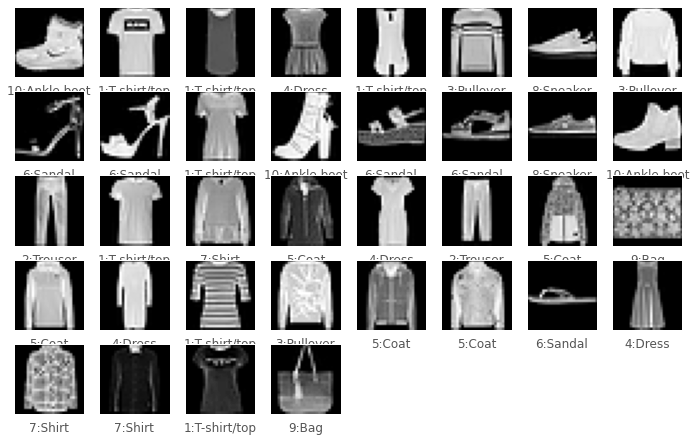

In [182]:
# YOU ARE REQUIRED TO INSERT YOUR CODES IN THIS CELL


def visualize_data(images, categories, images_per_row = 8):
    
    class_names = ["1:T-shirt/top", "2:Trouser", "3:Pullover", "4:Dress", "5:Coat", "6:Sandal", "7:Shirt", "8:Sneaker", "9:Bag", "10:Ankle boot"]
    
    n_images = len(images)
    n_rows = math.ceil(float(n_images)/images_per_row)
    fig = plt.figure(figsize=(1.5*images_per_row, 1.5*n_rows))
    fig.patch.set_facecolor('white')
    
    # plotting the images onto the plot space
    for i in range(n_images):
        plt.subplot(n_rows, images_per_row, i+1)
        plt.xticks([])
        plt.yticks([])
        plt.imshow(images[i], cmap="gray")
        class_index = categories[i]
        plt.xlabel(class_names[class_index])
    plt.show()
    

visualize_data(X_train_full_img[:36], y_train_full[:36])


####  <span style="color:red">**Question 2.4**</span>. Write code for the feed-forward neural net using TF 2.x

<div style="text-align: right"> <span style="color:red">[5 points]</span> </div>

We now develop a feed-forward neural network with the architecture $784 \rightarrow 20(ReLU) \rightarrow 40(ReLU) \rightarrow 10(softmax)$. You can choose your own way to implement your network and an optimizer of interest. You should train model in $20$ epochs and evaluate the trained model on the test set.

In [1]:
import tensorflow as tf
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.models import Sequential


In [184]:
#Insert your code here and you can add more cells if necessary
EPOCHS = 20

class DNN(tf.keras.Model):
    def __init__(self, num_classes= 10, hiddenAct=keras.activations.relu, neuronCount = (20,40)):
        super(DNN, self).__init__()
        self.num_classes = num_classes
        self.dense1 = Dense(units=neuronCount[0],  input_shape=(n_features,), activation=hiddenAct)
        self.dense2 = Dense(units=neuronCount[1], activation=hiddenAct)
        self.dense3 = Dense(self.num_classes, activation= 'softmax')
    
    def call(self, inputs):
        # ME: forward propagation
        h = self.dense1(inputs)
        h = self.dense2(h)
        h = self.dense3(h)
        return h

# 1: pre-processing (splitting is done earlier)
train_size= int(X_train.shape[0])
n_features= int(X_train.shape[1])
n_classes= len(np.unique(y_train))
print(f'train_size: {train_size} | n_features: {n_features} | n_classes: {n_classes}')

# 2: Build the feed forward network 784 -> 20(ReLU) -> 40(ReLU) -> 10(softmax)
# dnn_model = Sequential()
# dnn_model.add(Dense(units=20,  input_shape=(n_features,), activation='relu'))
# dnn_model.add(Dense(units=40, activation='relu'))
# dnn_model.add(Dense(units=n_classes, activation='softmax'))
model = DNN(n_classes)

# 3: compile the model with optimizer of choice

model.compile(optimizer='adam', 
                  loss='sparse_categorical_crossentropy', 
                  metrics=['accuracy'])


# 4: training the model (20 epochs)

# Initialize a tensorboard_callback 
logDirectory = "tf_logs/"
tensorboard_callback = keras.callbacks.TensorBoard(log_dir=logDirectory)

# Call the fit method, passing the tensorboard_callback 
history = model.fit(    x=X_train, y=y_train, 
                        batch_size=32, 
                        epochs=EPOCHS, 
                        validation_data=(X_valid, y_valid), 
                        callbacks=[tensorboard_callback])




train_size: 54599 | n_features: 784 | n_classes: 10
Epoch 1/20
1707/1707 [==============================] - 12s 7ms/step - loss: 0.5972 - accuracy: 0.7906 - val_loss: 0.4398 - val_accuracy: 0.8517
Epoch 2/20
1707/1707 [==============================] - 3s 2ms/step - loss: 0.4265 - accuracy: 0.8511 - val_loss: 0.3985 - val_accuracy: 0.8613
Epoch 3/20
1707/1707 [==============================] - 2s 1ms/step - loss: 0.3953 - accuracy: 0.8593 - val_loss: 0.3952 - val_accuracy: 0.8626
Epoch 4/20
1707/1707 [==============================] - 1s 840us/step - loss: 0.3757 - accuracy: 0.8672 - val_loss: 0.4054 - val_accuracy: 0.8597
Epoch 5/20
1707/1707 [==============================] - 2s 908us/step - loss: 0.3611 - accuracy: 0.8700 - val_loss: 0.3717 - val_accuracy: 0.8700
Epoch 6/20
1707/1707 [==============================] - 1s 863us/step - loss: 0.3468 - accuracy: 0.8751 - val_loss: 0.3689 - val_accuracy: 0.8719
Epoch 7/20
1707/1707 [==============================] - 1s 807us/step - loss:

In [185]:
# 5: peformance evaluation of trained model
model.evaluate(X_test, y_test)  #return loss and accuracy


313/313 [==============================] - 0s 808us/step - loss: 0.3809 - accuracy: 0.8689


[0.380939245223999, 0.8689000010490417]

In [186]:
# 6: save the model
model.save('q2-4_model', save_format='tf')


####  <span style="color:red">**Question 2.5**</span>. Tuning hyper-parameters with grid search
<div style="text-align: right"> <span style="color:red">[5 points]</span> </div>

Assume that you need to tune the number of neurons on the first and second hidden layers $n_1 \in \{20, 40\}$, $n_2 \in \{20, 40\}$  and the used activation function  $act \in \{sigmoid, tanh, relu\}$. The network has the architecture pattern $784 \rightarrow n_1 (act) \rightarrow n_2(act) \rightarrow 10(softmax)$ where $n_1, n_2$, and $act$ are in their grides. Write the code to tune the hyper-parameters $n_1, n_2$, and $act$. Note that you can freely choose the optimizer and learning rate of interest for this task.

---
#### **we want to optimize:**

1. number of neurons $n1, n2$ (range is between 20 to 40 neurons)
2. activation functions used, $act \in \{ sigmoid, tanh, relu\}$ 

optional: can use ANY optimizer and learning rate 

In [187]:
#Insert your code here. You can add more cells if necessary


lst_neurons_count = [20,40] # generate integers from 20 to 40 for simplicity's sake
lst_acts = [keras.activations.sigmoid, keras.activations.tanh, keras.activations.relu]

best_acc= - np.inf
best_history = None

best_neurons_combo = [None, None]
for act in lst_acts:
    for nc1 in lst_neurons_count:  # for the 1st hidden layer
        for nc2 in lst_neurons_count:  # for the 2nd hidden layer
            # build the model
            dnn = DNN(num_classes=n_classes, hiddenAct=act, neuronCount=(nc1, nc2)) # specifies the activation func to use for hidden layers 
            dnn.build(input_shape = (None, 784))
            dnn.compile(loss='sparse_categorical_crossentropy', metrics=['accuracy']) # optimzer is deaulted to RMSProp
            
            # model fitting
            print(f"Training with activation = {str(act)},  {nc1} neurons on 1st hidden layer, {nc2} on 2nd hidden layer")
            history = dnn.fit(X_train, y_train, batch_size=32, epochs=10, verbose=0)
            
            # performance evaluation
            valid_loss, valid_acc = dnn.evaluate(X_valid, y_valid)
            print('\tvalid acc = {}, valid loss = {}'.format(valid_acc, valid_loss))
            
            # check for better model
            if(valid_acc > best_acc):
                best_acc = valid_acc
                best_model = dnn
                best_act = act
                best_neurons_combo[0], best_neurons_combo[1] = nc1, nc2
                best_history = history

print(f'The best model is with activation function = {best_act}, {best_neurons_combo[0]} neurons on 1st hidden layer, {best_neurons_combo[1]} on 2nd hidden layer')
best_model.save('2-5_tuned_model', save_format='tf')
print('Saved the best model to hard disk')



Training with activation = <function sigmoid at 0x00000276D71504C0>,  20 neurons on 1st hidden layer, 20 on 2nd hidden layer
169/169 [==============================] - 0s 655us/step - loss: 0.3551 - accuracy: 0.8759
	valid acc = 0.8759489059448242, valid loss = 0.3551153838634491
Training with activation = <function sigmoid at 0x00000276D71504C0>,  20 neurons on 1st hidden layer, 40 on 2nd hidden layer
169/169 [==============================] - 0s 917us/step - loss: 0.3605 - accuracy: 0.8747
	valid acc = 0.8746528625488281, valid loss = 0.360460489988327
Training with activation = <function sigmoid at 0x00000276D71504C0>,  40 neurons on 1st hidden layer, 20 on 2nd hidden layer
169/169 [==============================] - 0s 774us/step - loss: 0.3354 - accuracy: 0.8811
	valid acc = 0.8811331391334534, valid loss = 0.3354138135910034
Training with activation = <function sigmoid at 0x00000276D71504C0>,  40 neurons on 1st hidden layer, 40 on 2nd hidden layer
169/169 [========================

####  <span style="color:red">**Question 2.6**</span>. Experimenting with **the label smoothing** technique
<div style="text-align: right"> <span style="color:red">[5 points]</span> </div>

Implement the label smoothing technique (i.e., [link for main paper](https://papers.nips.cc/paper/2019/file/f1748d6b0fd9d439f71450117eba2725-Paper.pdf) from Goeff Hinton) by yourself. Note that you cannot use the built-in label-smoothing loss function in TF2.x. Try the label smoothing technique with $\alpha =0.1, 0.15, 0.2$ and report the performances. You need to examine the label smoothing technique with the best architecture obtained in **Question 2.5**.

### Report of performances

From my observations, using different alpha values did result in different performances in terms of validation accuracy.

Due to my misundestanding of the question, it was initially observed that doing label smoothing on only the training labels BUT not on the validation labels, offer a better performance with higher values of alpha.

However, now that we introduced label smoothing to both training and validation dataset labels, it was found that the lowest alpha value = 0.1 offer the best validation accuracy. After testing against the test set, it also yielded an accuracy of 87%.

___
#### Run Results:
Training best model from q2.5 with alpha=0.1
169/169 [==============================] - 0s 786us/step - loss: 0.7614 - accuracy: 0.8859
	valid acc = 0.885947048664093, valid loss = 0.7613660097122192
Training best model from q2.5 with alpha=0.15
169/169 [==============================] - 0s 744us/step - loss: 0.9228 - accuracy: 0.8843
	valid acc = 0.8842806816101074, valid loss = 0.9227955341339111
Training best model from q2.5 with alpha=0.2
169/169 [==============================] - 0s 732us/step - loss: 1.0806 - accuracy: 0.8852
	valid acc = 0.8852064609527588, valid loss = 1.080588459968567

In [188]:
def smoothen(label_vectors, alph):
    """ smoothens labels in the form of one hot vectors""" 
    # label_vectors = one hot vector of smoothed labels
    smoothed = []
    for vector in label_vectors:
        smoothed_label_vector = []
        for bit in vector:
            # smoothed_label_vector =  [label_smooth(y_k=bit, alpha=alph, K=len(vector)) for bit in vector]
            smoothed_bit = label_smooth(y_k=bit, alpha=alph, K=len(vector))
            smoothed_label_vector.append(smoothed_bit)
            # print(f'{bit} , {smoothed_bit}')
        # print(f'before smooth ({len(vector)}): {vector}, after smooth ({len(smoothed_label_vector)}): {smoothed_label_vector}')
        smoothed.append(smoothed_label_vector)
    return smoothed
 
# smoothen(np.eye(n_classes)[y_train], 0.1)


In [192]:
#Insert your code here. You can add more cells if necessary

# 1: prepare several smooth labelling parameters, alpha
alphas = [0.1, 0.15, 0.2]


# 2: fit and see evaluate performance of each smooth labelling parameter, alpha 
# NOTE: we need to use the BEST model using the BEST hyper parameters from Q2.5
best_alpha = None
best_acc = - np.inf
best_history = None

for alpha in alphas:    
    # build the model
    dnn = DNN(num_classes=10, hiddenAct=best_act, neuronCount=best_neurons_combo) # specifies the activation func to use for hidden layers 
    dnn.build(input_shape = (None, 784))
    # need to use CategoricalCrossentropy instead of sparse_categorical_crossentropy
    # cce = tf.keras.losses.CategoricalCrossentropy()
    dnn.compile(loss="categorical_crossentropy", metrics=['accuracy']) # optimzer is deaulted to RMSProp
    
    # model fitting
    print(f"Training best model from q2.5 with alpha={alpha}")
    # NOTE: this is where we "smoothen" the y labels BUT we need to convert the list of labels into a list of one-hot-vectors first
    history = dnn.fit(X_train, np.array(smoothen(np.eye(n_classes)[y_train], alpha)), batch_size=32, epochs=10, verbose=0)
    
    # performance evaluation
    y_valid_vector = np.array(smoothen(np.eye(n_classes)[y_valid], alpha)) # also smoothen y valid
    valid_loss, valid_acc = dnn.evaluate(X_valid, y_valid_vector)
    print('\tvalid acc = {}, valid loss = {}'.format(valid_acc, valid_loss))

    # check for better model using different alpha values
    if(valid_acc > best_acc):
        best_alpha = alpha
        best_acc = valid_acc
        best_model = dnn
        best_history = history

print(f'The best alpha from 2.5 DNN model is alpha={best_alpha}')
best_model.save('2-6_tuned_model', save_format='tf')
print('Saved the best alpha model for 2.6 to hard disk')


Training best model from q2.5 with alpha=0.1
169/169 [==============================] - 0s 786us/step - loss: 0.7614 - accuracy: 0.8859
	valid acc = 0.885947048664093, valid loss = 0.7613660097122192
Training best model from q2.5 with alpha=0.15
169/169 [==============================] - 0s 744us/step - loss: 0.9228 - accuracy: 0.8843
	valid acc = 0.8842806816101074, valid loss = 0.9227955341339111
Training best model from q2.5 with alpha=0.2
169/169 [==============================] - 0s 732us/step - loss: 1.0806 - accuracy: 0.8852
	valid acc = 0.8852064609527588, valid loss = 1.080588459968567
The best alpha from 2.5 DNN model is alpha=0.1
Saved the best alpha model for 2.6 to hard disk


In [195]:
dnn.evaluate(X_test, np.eye(n_classes)[y_test])

313/313 [==============================] - 0s 891us/step - loss: 0.5314 - accuracy: 0.8710


[0.5313766002655029, 0.8709999918937683]

## <span style="color:#0b486b">Part 3: Convolutional Neural Networks and Image Classification</span>

**<div style="text-align: right"><span style="color:red">[Total marks for this part: 40 points]</span></div>**

**This part of the asssignment is designed to assess your knowledge and coding skill with Tensorflow as well as hands-on experience with training Convolutional Neural Network (CNN).**

**The dataset we use for this part is a small animal dataset consisting of $5,000$ images of cats, dogs, fishes, lions, chickens, elephants, butterflies, cows, spiders, and horses, each of which has 500 images. You can download the dataset at [download here](https://drive.google.com/file/d/1bEwEx72lLrjY_Idj_FgV22atIdjtCV66/view?usp=sharing) and then decompress to the folder `datasets\Animals` in your assignment folder.**

**Your task is to build a CNN model using *TF 2.x* to classify these animals. You're provided with the module <span style="color:red">models.py</span>, which you can find in the assignment folder, with some of the following classes:**

1. `AnimalsDatasetManager`: Support with loading and spliting the dataset into the train-val-test sets. It also supports generating next batches for training. `AnimalsDatasetManager` will be passed to CNN model for training and testing.
2. `DefaultModel`: A base class for the CNN model.
3. `YourModel`: The class you'll need to implement for building your CNN model. It inherits some useful attributes and functions from the base class `DefaultModel`

Firstly, we need to run the following cells to load and preprocess the Animal dataset.

In [3]:
%load_ext autoreload
%autoreload 2



Install the package `imutils` if you have not installed yet

In [4]:
! pip install imutils

In [5]:
import os
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline
import models
from models import SimplePreprocessor, AnimalsDatasetManager, DefaultModel

In [6]:
def create_label_folder_dict(adir):
    sub_folders= [folder for folder in os.listdir(adir)
                  if os.path.isdir(os.path.join(adir, folder))]
    label_folder_dict= dict()
    for folder in sub_folders:
        item= {folder: os.path.abspath(os.path.join(adir, folder))}
        label_folder_dict.update(item)
    return label_folder_dict

In [7]:
# TODO: ask what does this do?
label_folder_dict = create_label_folder_dict("./datasets/Animals")
print(label_folder_dict)

{'butterfiles': 'd:\\monash stuff\\education stuff\\3rd yr\\FIT3181 Deep Learning\\assignment\\FIT3181_Assignment_1\\datasets\\Animals\\butterfiles', 'cats': 'd:\\monash stuff\\education stuff\\3rd yr\\FIT3181 Deep Learning\\assignment\\FIT3181_Assignment_1\\datasets\\Animals\\cats', 'chickens': 'd:\\monash stuff\\education stuff\\3rd yr\\FIT3181 Deep Learning\\assignment\\FIT3181_Assignment_1\\datasets\\Animals\\chickens', 'cows': 'd:\\monash stuff\\education stuff\\3rd yr\\FIT3181 Deep Learning\\assignment\\FIT3181_Assignment_1\\datasets\\Animals\\cows', 'dogs': 'd:\\monash stuff\\education stuff\\3rd yr\\FIT3181 Deep Learning\\assignment\\FIT3181_Assignment_1\\datasets\\Animals\\dogs', 'elephants': 'd:\\monash stuff\\education stuff\\3rd yr\\FIT3181 Deep Learning\\assignment\\FIT3181_Assignment_1\\datasets\\Animals\\elephants', 'fishes': 'd:\\monash stuff\\education stuff\\3rd yr\\FIT3181 Deep Learning\\assignment\\FIT3181_Assignment_1\\datasets\\Animals\\fishes', 'horses': 'd:\\mon

The below code helps to create a data manager that contains all relevant methods used to manage and process the experimental data. 

In [8]:
sp = SimplePreprocessor(width=32, height=32)
data_manager = AnimalsDatasetManager([sp])
data_manager.load(label_folder_dict, verbose=100)
data_manager.process_data_label()
data_manager.train_valid_test_split()

butterfiles 500
Processed 100/500
Processed 200/500
Processed 300/500
Processed 400/500
Processed 500/500
cats 501
Processed 100/500
Processed 200/500
Processed 300/500
Processed 400/500
Processed 500/500
chickens 500
Processed 100/500
Processed 200/500
Processed 300/500
Processed 400/500
Processed 500/500
cows 500
Processed 100/500
Processed 200/500
Processed 300/500
Processed 400/500
Processed 500/500
dogs 501
Processed 100/500
Processed 200/500
Processed 300/500
Processed 400/500
Processed 500/500
elephants 500
Processed 100/500
Processed 200/500
Processed 300/500
Processed 400/500
Processed 500/500
fishes 500
Processed 100/500
Processed 200/500
Processed 300/500
Processed 400/500
Processed 500/500
horses 500
Processed 100/500
Processed 200/500
Processed 300/500
Processed 400/500
Processed 500/500
lions 500
Processed 100/500
Processed 200/500
Processed 300/500
Processed 400/500
Processed 500/500
spiders 500
Processed 100/500
Processed 200/500
Processed 300/500
Processed 400/500
Proc

Note that the object `data_manager` has the attributes relating to *the training, validation, and testing sets* as shown belows. You can use them in training your developped models in the sequel.

In [9]:
# NOTE:  there are 500 images in total for each class (but there are 501 for cat class)
    
print(data_manager.X_train.shape, data_manager.y_train.shape) 
print(data_manager.X_valid.shape, data_manager.y_valid.shape)
print(data_manager.X_test.shape, data_manager.y_test.shape)
print(data_manager.classes)

print(data_manager.X_train)
print(data_manager.y_train)

(4000, 32, 32, 3) (4000,)
(500, 32, 32, 3) (500,)
(500, 32, 32, 3) (500,)
['butterfiles' 'cats' 'chickens' 'cows' 'dogs' 'elephants' 'fishes'
 'horses' 'lions' 'spiders']
[[[[ 0.77254902  0.63921569  0.37254902]
   [ 0.77254902  0.64705882  0.38039216]
   [ 0.78039216  0.65490196  0.38823529]
   ...
   [ 0.73333333  0.57647059  0.28627451]
   [ 0.7254902   0.57647059  0.2627451 ]
   [ 0.7254902   0.57647059  0.27058824]]

  [[ 0.76470588  0.62352941  0.36470588]
   [ 0.76470588  0.64705882  0.37254902]
   [ 0.77254902  0.65490196  0.38039216]
   ...
   [ 0.73333333  0.58431373  0.29411765]
   [ 0.73333333  0.57647059  0.28627451]
   [ 0.7254902   0.57647059  0.27843137]]

  [[ 0.76470588  0.61568627  0.35686275]
   [ 0.77254902  0.62352941  0.36470588]
   [ 0.77254902  0.63921569  0.37254902]
   ...
   [ 0.73333333  0.59215686  0.30980392]
   [ 0.74117647  0.58431373  0.30196078]
   [ 0.73333333  0.58431373  0.30980392]]

  ...

  [[ 0.63921569  0.38823529  0.03529412]
   [ 0.57647059 

We now run the **default model** built in the **models.py** file which serves as a basic baseline to start the investigation. Follow the following steps to realize how to run a model and know the built-in methods associated to a model developped in the DefaultModel class.

We first initialize a default model from the DefaultModel class. Basically, we can define the relevant parameters of training a model including `num_classes`, `optimizer`, `learning_rate`, `batch_size`, and `num_epochs`.

In [10]:
network1 = DefaultModel(name='network1',
                       num_classes=len(data_manager.classes),
                       optimizer='sgd',
                       batch_size= 128,
                     #   num_epochs = 50,
                       num_epochs = 20,
                       learning_rate=0.5)

The method `build_cnn()` assists us in building your convolutional neural network. You can view the code (in the **models.py** file) of the model behind a default model to realize how simple it is. Additionally, the method `summary()` shows the architecture of a model.

In [11]:
network1.build_cnn()
network1.summary()

built CNN!
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
average_pooling2d (AveragePo (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 16, 16, 64)        36928     
_________________________________________________________________
average_pooling2d_1 (Average (None, 8, 8, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 4096)  

To train a model regarding to the datasets stored in `data_manager`, you can invoke the method `fit()` for which you can specify the batch size and number of epochs for your training. 

In [11]:
network1.fit(data_manager, batch_size = 64, num_epochs = 20)


Epoch 1/20
63/63 [==============================] - 3s 51ms/step - loss: 2.2937 - accuracy: 0.1375 - val_loss: 2.3131 - val_accuracy: 0.0940
Epoch 2/20
63/63 [==============================] - 2s 38ms/step - loss: 2.3055 - accuracy: 0.0913 - val_loss: 2.2940 - val_accuracy: 0.0920
Epoch 3/20
63/63 [==============================] - 2s 33ms/step - loss: 2.3025 - accuracy: 0.1098 - val_loss: 2.3012 - val_accuracy: 0.1120
Epoch 4/20
63/63 [==============================] - 2s 37ms/step - loss: 2.2948 - accuracy: 0.1110 - val_loss: 2.3015 - val_accuracy: 0.1120
Epoch 5/20
63/63 [==============================] - 2s 32ms/step - loss: 2.2976 - accuracy: 0.1117 - val_loss: 2.3006 - val_accuracy: 0.0940
Epoch 6/20
63/63 [==============================] - 2s 34ms/step - loss: 2.3037 - accuracy: 0.1123 - val_loss: 2.3042 - val_accuracy: 0.0880
Epoch 7/20
63/63 [==============================] - 2s 28ms/step - loss: 2.3050 - accuracy: 0.1000 - val_loss: 2.3047 - val_accuracy: 0.1080
Epoch 8/20
63

Here you can compute the accuracy of your trained model with respect to a separate testing set.

In [12]:
network1.compute_accuracy(data_manager.X_test, data_manager.y_test)

8/8 [==============================] - 0s 24ms/step - loss: 2.3048 - accuracy: 0.0920


0.09200000017881393

Below shows how you can inspect the training progress.

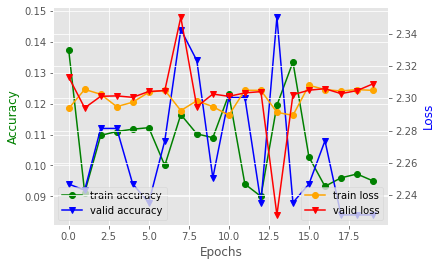

In [13]:
network1.plot_progress()

You can use the method `predict()` to predict labels for data examples in a test set.

In [14]:
network1.predict(data_manager.X_test[0:10])

array([5, 5, 5, 5, 5, 5, 5, 5, 5, 5], dtype=int64)

Finally, the method `plot_prediction()` visualizes the predictions for a test set in which several images are chosen to show the predictions.

<Figure size 432x288 with 0 Axes>

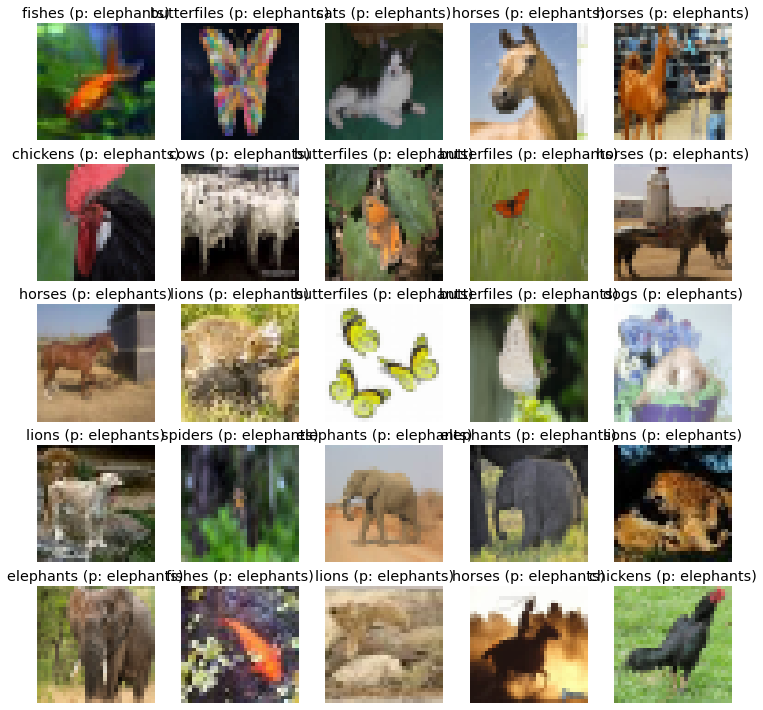

In [15]:
network1.plot_prediction(data_manager.X_test, data_manager.y_test, data_manager.classes)

<span style="color:red">**Question 3.1**</span> **After running the above cells to train the default model and observe the learning curve. Report your observation (i.e. did the model learn well? if not, what is the problem? What would you do to improve it?). Write your answer below.**

<div style="text-align: right"> <span style="color:red">[4 points]</span> </div>

*#Your answer and observation here*

### ANSWER:
The predictions are based on numerous runs (around 7 different runs implying 7 different trained models)
<br><br>
in these runs, the weight initialization of these models results in very different trained models hence the training accuracy
<br><br>
Some of these models learn very well and there is an upward trend for the both training and validation accuracy
<br><br>
However, some of the models did not learn very well, i.e. underfitting or overfitting
<br><br>
for the models that are underfitting, there are 2 different scenarios, whereby the first scenario is that the accuracy converges to a certain value 
- and given anymore epochs, we will certainly see that the accuracy further and further down to a small value that underfits the testing set
- this can be due to that there arent enough parameters in the network (e.g. adding more layers, neurons count, different optimizers, etc.)
- so we might have to explore ways such that we can add enough complexity to the network but avoid overfitting it
- however, it could also be the case that the learning rate is too high, and we need to consider fine tuning the learning rate, as high learning rates tend to "overshoot", hence the convergence to a single loss value and directly correlates to convergence for the accuracy value.

while in the other scenario, where there is an upwards trend
- which indicates we just might need more epochs for the training (or the learning rate is too low for this case and requires an appropriate optimizer)

**CONCLUSION:**
an overall solution to the poor performance might just be better weight initializations employing the weight initialization strategies mentioned in the lectures such as Xavier and He weight initialization.





---
**For questions 3.2 to 3.9, you'll need to write your own model in a way that makes it easy for you to experiment with different architectures and parameters. The goal is to be able to pass the parameters to initialize a new instance of `YourModel` to build different network architectures with different parameters. Below are descriptions of some parameters for `YourModel`, which you can find in function `__init__()` for the class `DefaultModel`:**

1. `num_blocks`: an integer specifying the number of blocks in our network. Each block has the pattern `[conv, batch norm, activation, conv, batch norm, activation, mean pool, dropout]`. All convolutional layers have filter size $(3, 3)$, strides $(1, 1)$ and 'SAME' padding, and all mean pool layers have strides $(2, 2)$ and 'SAME' padding. The network will consists of a few blocks before applying a linear layer to output the logits for the softmax layer.

2. `feature_maps`: the number of feature maps in the first block of the network. The number of feature_maps will double in each of the following block. To make it convenient for you, we already calculated the number of feature maps for each block for you in line $106$
3. `drop_rate`: the keep probability for dropout. Setting `drop_rate` to $0.0$ means not using dropout. 
4. `batch_norm`: the batch normalization function is used or not. Setting `batch_norm` to `None` means not using batch normalization. 
5. The `skip connection` is added to the output of the second `batch norm`. Additionally, your class has a boolean property (i.e., instance variable) named `use_skip`. If `use_skip=True`, the skip connectnion is enable. Otherwise, if `use_skip=False`, the skip connectnion is disable.

Below is the architecture of one block:

<img src="Figures/OneBlock.png" width="350" align="center"/>

Below is the architecture of the entire deep net with `two blocks`:

<img src="Figures/NetworkArchitecture.png" width="1200" align="center"/>

Here we assume that the first block has `feature_maps = feature_maps[0] = 32`. Note that the initial number of feature maps of the first block is declared in the instance variable `feature_maps` and is multiplied by $2$ in each follpwing block. 

In [12]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models

In [13]:
MY_SEED = 1234
tf.random.set_seed(MY_SEED)

<span style="color:red">**Question 3.2**</span> **Write the code of the `YourModel` class here. Note that this class will inherit from the `DefaultModel` class. You'll only need to re-write the code for the `build_cnn` method in the `YourModel` class from the cell below. Note that the `YourModel` class   is inherited from the `DefaultModel` class.**

<div style="text-align: right"> <span style="color:red">[4 points]</span> </div>

In [14]:
print(data_manager.X_train.shape)
print(data_manager.y_train.shape)

(4000, 32, 32, 3)
(4000,)


In [15]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import datasets, models, layers, regularizers
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [16]:
print(len(tf.config.list_physical_devices('GPU')))

0


In [17]:
from functools import partial

bn_momentum= 0.9
bn_eps= 2E-5
reg= 0.001

# DefaultBatchNorm = partial(keras.layers.BatchNormalization|, momentum=bn_momentum, epsilon=bn_eps)
# DefaultConv2D = partial(keras.layers.Conv2D, kernel_regularizer=regularizers.l2(reg), use_bias=False, padding='same')
DefaultConv2D = partial(keras.layers.Conv2D, padding='same')
DefaultBatchNorm = partial(keras.layers.BatchNormalization)
DefaultMeanPool = partial(keras.layers.AvgPool2D, strides=(2,2), padding='same')
DefaultDropout = partial(keras.layers.Dropout)

In [18]:
class YourModel(DefaultModel):
    def __init__(self,
                 name='network1',
                 width=32, height=32, depth=3,
                 num_blocks=2,
                 feature_maps=32,
                 num_classes=data_manager.classes, 
                 drop_rate=0.2,
                 batch_norm = None,
                 is_augmentation = False,
                 activation_func='relu',
                 use_skip = True,
                 optimizer='adam',
                 batch_size=10,
                 num_epochs= 20,
                 learning_rate=0.0001,
                 verbose= True,
                 loss_func="sparse_categorical_crossentropy"):
        super(YourModel, self).__init__(name, width, height, depth, num_blocks, feature_maps, num_classes, drop_rate, batch_norm, is_augmentation, 
                                        activation_func, use_skip, optimizer, batch_size, num_epochs, learning_rate, verbose)
        self.loss_func = loss_func
        
    @staticmethod
    def ResidualBlock(inputs, num_filters, drop_rate, skip_connection= False):
        # Each block has the pattern [conv, batch norm, activation, conv, batch norm, activation, mean pool, dropout]
        # start with 32 feature maps, each successive block will multiply feature map count by 2

        skip_layer = DefaultConv2D(filters=num_filters, kernel_size=3, strides=(1,1))
                                   
        # before skip connection
        layers_1 = [DefaultBatchNorm(), 
                    layers.Activation(activation='relu'),
                    DefaultConv2D(filters=num_filters, kernel_size=3, strides=(1,1)), 
                    DefaultBatchNorm()]

        # after skip connection
        layers_2 = [layers.Activation(activation='relu'), 
                    DefaultMeanPool(), 
                    DefaultDropout(rate=drop_rate)]
        
        # apply operations in each layer to input
        h = skip_layer(inputs)
        for layer in layers_1:
            h = layer(h)

        if skip_connection:
             # no usage of 1x1 conv here to make sure the addition between two matrices in skipconnection is of same size
            h = h + skip_layer(inputs) # addition of matrix when doing skip connection
        
        for layer in layers_2:
            h = layer(h)
            
        return h
        
        
    def build_cnn(self):
        self.model = models.Model()
        inputs = layers.Input(shape=(self.width, self.height, self.depth))
        h = inputs
        
        # adding residual blocks
        for i in range(self.num_blocks):
            h = YourModel.ResidualBlock(h, self.feature_maps[i], drop_rate=self.drop_rate, skip_connection=self.use_skip)
        
        # flatten and dense alyer
        h = layers.Flatten()(h)
        h = layers.Dense(units=self.num_classes, activation="softmax")(h)
        
        self.model = models.Model(inputs=inputs, outputs=h, name="YourModel") # We now have a ResNet model
        self.model.compile(optimizer=self.optimizer, loss=self.loss_func, metrics=['accuracy'])
        


        


<span style="color:red">**Question 3.3**</span> **Once writing your own model, you need to compare two cases: (i) *using the skip connection* and (ii) *not using the skip connection*. You should set the instance variable `use_skip` to either `True` or `False`. For your runs, report which case is better and if you confront overfitting in training.**
    
<div style="text-align: right"> <span style="color:red">[6 points]</span> </div>

#*Write your report and observation here*

From my observations, I have picked a total of 4 epochs (2 each from the 2 different models with use_skip=True AND use_skip=False)

We could see that from the appendix stated below, the highest validation accuracy among all the epochs for the model that uses skip connection is HIHGER than the one which doesnt.

Another observation is in the final epoch, the model that uses skip connection also performed better in terms of validation accuracy and hence less validation loss.

Both models overfits quite heavily, however, we conclude that the model which doesnt use skip connection is more prone to overfitting, and hence should give a better training result (validation accuracy) when we encounter overfitting issues.

### Appendix: 
i) Skip Connection
Highest:
Epoch 10/20
125/125 [==============================] - 8s 67ms/step - loss: 0.1812 - accuracy: 0.9523 - val_loss: 1.3508 - val_accuracy: 0.6400


ii) Without Skip Connection
Highest: 
Epoch 11/20
125/125 [==============================] - 5s 40ms/step - loss: 0.1714 - accuracy: 0.9545 - val_loss: 1.3374 - val_accuracy: 0.6280






In [17]:
our_network_skip = YourModel(name='3.3use_skip',
                     feature_maps=32,
                     num_classes=len(data_manager.classes),
                     num_blocks=3,
                    #  num_blocks=2,
                     drop_rate= 0.0, 
                     batch_norm=True, 
                     use_skip = True,
                     optimizer='adam',
                     learning_rate= 0.001)

our_network_skip.build_cnn()

our_network_skip.summary()

AttributeError: module 'models' has no attribute 'Model'

In [ ]:
print(data_manager)

In [44]:
our_network_skip.fit(data_manager, batch_size=32, num_epochs=20)
our_network_skip.model.save("q3.3/use_skip", save_format='tf')



Epoch 1/20
125/125 [==============================] - 5s 36ms/step - loss: 1.7972 - accuracy: 0.3825 - val_loss: 2.7810 - val_accuracy: 0.1320
Epoch 2/20
125/125 [==============================] - 5s 40ms/step - loss: 1.3332 - accuracy: 0.5403 - val_loss: 2.1481 - val_accuracy: 0.2480
Epoch 3/20
125/125 [==============================] - 6s 46ms/step - loss: 1.0978 - accuracy: 0.6288 - val_loss: 2.7056 - val_accuracy: 0.2900
Epoch 4/20
125/125 [==============================] - 5s 40ms/step - loss: 0.8995 - accuracy: 0.6938 - val_loss: 1.3495 - val_accuracy: 0.5500
Epoch 5/20
125/125 [==============================] - 6s 45ms/step - loss: 0.7256 - accuracy: 0.7577 - val_loss: 1.2917 - val_accuracy: 0.5660
Epoch 6/20
125/125 [==============================] - 7s 52ms/step - loss: 0.5600 - accuracy: 0.8140 - val_loss: 1.3805 - val_accuracy: 0.5760
Epoch 7/20
125/125 [==============================] - 6s 45ms/step - loss: 0.4381 - accuracy: 0.8602 - val_loss: 1.5001 - val_accuracy: 0.5540

In [45]:
our_network_no_skip = YourModel(name='3.3no_skip',
                     feature_maps=32,
                     num_classes=len(data_manager.classes),
                     num_blocks=3,
                     drop_rate= 0.0, 
                     batch_norm=True, 
                     use_skip = False,
                     optimizer='adam',
                     learning_rate= 0.001)

our_network_no_skip.build_cnn()
our_network_no_skip.summary()

Model: "YourModel"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_8 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
conv2d_52 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
batch_normalization_38 (Batc (None, 32, 32, 32)        128       
_________________________________________________________________
activation_38 (Activation)   (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_53 (Conv2D)           (None, 32, 32, 32)        9248      
_________________________________________________________________
batch_normalization_39 (Batc (None, 32, 32, 32)        128       
_________________________________________________________________
activation_39 (Activation)   (None, 32, 32, 32)        0 

In [46]:
our_network_no_skip.fit(data_manager, batch_size=32, num_epochs=20)
our_network_skip.model.save("q3.3/non_skip", save_format='tf')


Epoch 1/20
125/125 [==============================] - 7s 51ms/step - loss: 1.8504 - accuracy: 0.3585 - val_loss: 2.6181 - val_accuracy: 0.0900
Epoch 2/20
125/125 [==============================] - 6s 46ms/step - loss: 1.4287 - accuracy: 0.5040 - val_loss: 3.0355 - val_accuracy: 0.1540
Epoch 3/20
125/125 [==============================] - 6s 45ms/step - loss: 1.2015 - accuracy: 0.5863 - val_loss: 2.5282 - val_accuracy: 0.2740
Epoch 4/20
125/125 [==============================] - 5s 39ms/step - loss: 0.9962 - accuracy: 0.6560 - val_loss: 2.0439 - val_accuracy: 0.4080
Epoch 5/20
125/125 [==============================] - 5s 40ms/step - loss: 0.8430 - accuracy: 0.7082 - val_loss: 1.3800 - val_accuracy: 0.5520
Epoch 6/20
125/125 [==============================] - 5s 40ms/step - loss: 0.7004 - accuracy: 0.7630 - val_loss: 1.3068 - val_accuracy: 0.5740
Epoch 7/20
125/125 [==============================] - 5s 41ms/step - loss: 0.5656 - accuracy: 0.8112 - val_loss: 1.5120 - val_accuracy: 0.5400

<span style="color:red">**Question 3.4**</span> **Now, let us tune the $num\_blocks \in \{2,3,4\}$, $use\_skip \in \{True, False\}$, and $learning\_rate \in \{0.001, 0.0001\}$. Write your code for this tuning and report the result of the best model on the testing set. Note that you need to show your code for tuning and evaluating on the test set to earn the full marks. During tuning, you can set the instance variable `verbose` of your model to `False` for not showing the training details of each epoch.**
 
<div style="text-align: right"> <span style="color:red">[4 points]</span> </div>

#### *Report the best parameters and the testing accuracy here*

From the hyperparameter grid search, the hyperparameters for best tuned ques 3.4 model is: num_blocks=3, skip_flag=True, learn_rate=0.001



In [49]:
#Insert your code here. You can add more cells if necessary


# 1: prepare hyperparameters
num_blocks_lst = (2,3,4)
use_skip_flags = (True, False)
learning_rates = (0.001, 0.0001)

def smoothen(labels, alph):
    return [label_smooth(y_k=label, alpha=alph, K=len(labels)) for label in labels]

# NOTE: we need to use the BEST model using the BEST hyper parameters from Q2.5
best_num_blocks = None
best_skip_flag = None
best_lr = None

best_acc = -np.inf
best_history = None

# 2: get best model by tuning hyperparameters
for num_blocks in num_blocks_lst:  
    for skip_flag in use_skip_flags:
        for lr in learning_rates:
            # build the model
            
            # build the model using YourModel class
            cnn = YourModel(name='q3.4',
                                feature_maps=32,
                                num_classes=len(data_manager.classes),
                                num_blocks=num_blocks,
                                drop_rate= 0.0, 
                                batch_norm=True, 
                                use_skip = skip_flag,
                                optimizer='adam',
                                learning_rate= lr)

            cnn.build_cnn() # has model.compile inside
            
            # model fitting
            print(f"Training best model from q3.4 with num_blocks={num_blocks}, skip_flag={skip_flag}, learn_rate={lr}")            
            # build the model use datamanger to send in data
            history = cnn.fit(data_manager, batch_size=32, num_epochs=10)
            
            # performance evaluation
            valid_acc = cnn.compute_accuracy(data_manager.X_valid, data_manager.y_valid, batch_size=32)
            print(f'\tvalid acc = {valid_acc}')

            # check for better model (valid accuracy) using different alpha values
            if(valid_acc > best_acc):
                best_num_blocks = num_blocks
                best_skip_flag = skip_flag
                best_lr = lr
                
                best_acc = valid_acc
                best_model = cnn
                best_history = history


# 4: save model
print(f'The hyperparameters for best tuned ques 3.4 model is: num_blocks={best_num_blocks}, skip_flag={best_skip_flag}, learn_rate={best_lr}')
best_model.model.save('q3models/q3.4', save_format='tf')
print('Saved the best tuned model for QUES 3.4 to hard disk')





Training best model from q3.4 with num_blocks=2, skip_flag=True, learn_rate=0.001
Epoch 1/10
125/125 [==============================] - 7s 51ms/step - loss: 1.8786 - accuracy: 0.3658 - val_loss: 2.4858 - val_accuracy: 0.1540
Epoch 2/10
125/125 [==============================] - 5s 43ms/step - loss: 1.3489 - accuracy: 0.5440 - val_loss: 2.4428 - val_accuracy: 0.2440
Epoch 3/10
125/125 [==============================] - 4s 32ms/step - loss: 1.0897 - accuracy: 0.6242 - val_loss: 1.9659 - val_accuracy: 0.3420
Epoch 4/10
125/125 [==============================] - 3s 25ms/step - loss: 0.8815 - accuracy: 0.7057 - val_loss: 1.4739 - val_accuracy: 0.5000
Epoch 5/10
125/125 [==============================] - 3s 26ms/step - loss: 0.7097 - accuracy: 0.7657 - val_loss: 1.2650 - val_accuracy: 0.5940
Epoch 6/10
125/125 [==============================] - 4s 28ms/step - loss: 0.5606 - accuracy: 0.8150 - val_loss: 1.3977 - val_accuracy: 0.5800
Epoch 7/10
125/125 [==============================] - 4s 36m

#### Evaluation by fitting onto test set (after tuning hyperparameters: blocks, skip_flag, learn_rate)


In [29]:
model = keras.models.load_model('q3models/q3.4')  # loads previously best tuned model 
yourmodel = YourModel()
yourmodel.model = model


In [30]:
print("--------test set evaluation--------")
# cnn.evaluate(X_test, y_test)'
sum_acc = 0
iterations = 5
print(data_manager.X_test.shape)
print(data_manager.y_test.shape)

test_accuracy = yourmodel.compute_accuracy(data_manager.X_test, data_manager.y_test, batch_size = 32)

--------test set evaluation--------
(500, 32, 32, 3)
(500,)
16/16 [==============================] - 0s 13ms/step - loss: 1.2435 - accuracy: 0.6520


<span style="color:red">**Question 3.5**</span> **We now try to apply data augmentation to improve the performance. Extend the code of the class `YourModel` so that if the attribute `is_augmentation` is set to `True`, we apply the data augmentation. Also you need to incorporate early stopping to your training process. Specifically, you early stop the training if the valid accuracy cannot increase in three consecutive epochs.**
   
<div style="text-align: right"> <span style="color:red">[4 points]</span> </div>

In [32]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping

# The hyperparameters for best tuned ques 3.4 model is: num_blocks=3, skip_flag=True, learn_rate=0.001



Wtire your code in the cell below. Hint that you can rewrite the code of the `fit` method to apply the data augmentation. In addition, you can copy the code of `build_cnn` method above to reuse here.

In [33]:
print(data_manager.y_train.shape)
print(data_manager.X_train.shape)

(4000,)
(4000, 32, 32, 3)


In [34]:

class YourModelAug(DefaultModel):
    """ uses one hot vector for y labels """
    def __init__(self,
                 name='network1',
                 width=32, height=32, depth=3,
                 num_blocks=2,
                 feature_maps=32,
                 num_classes=4, 
                 drop_rate=0.2,
                 batch_norm = None,
                 is_augmentation = False,
                 activation_func='relu',
                 use_skip = True,
                 optimizer='adam',
                 batch_size=10,
                 num_epochs= 20,
                 learning_rate=0.0001,
                 loss_func = "sparse_categorical_crossentropy"):
        super(YourModelAug, self).__init__(name, width, height, depth, num_blocks, feature_maps, num_classes, drop_rate, batch_norm, is_augmentation, 
                                        activation_func, use_skip, optimizer, batch_size, num_epochs, learning_rate)
        self.loss_func = loss_func
        
    def build_cnn(self):
        #reuse code of previous section here
        self.model = models.Model()
        inputs = layers.Input(shape=(self.width, self.height, self.depth))
        h = inputs
         
        # adding residual blocks
        for i in range(self.num_blocks):
            h = YourModel.ResidualBlock(h, self.feature_maps[i], drop_rate=self.drop_rate, skip_connection= self.use_skip)
        
        # flatten and dense alyer
        h = layers.Flatten()(h)
        h = layers.Dense(units=self.num_classes, activation="softmax")(h)
        
        self.model = models.Model(inputs=inputs, outputs=h, name="YourModel") # We now have a ResNet model
        self.model.compile(optimizer=self.optimizer, loss=self.loss_func, metrics=['accuracy'])
        
        
    def fit(self, data_manager, batch_size=None, num_epochs=None):
        """
        # references:
        # https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image/ImageDataGenerator
        # https://github.com/keras-team/keras/blob/v2.10.0/keras/preprocessing/image.py#L1488-L1562
        """
                
        batch_size = self.batch_size if batch_size is None else batch_size
        num_epochs = self.num_epochs if num_epochs is None else num_epochs
        
        #  apply data augmentation here, rotate images etc.
        datagen = ImageDataGenerator(horizontal_flip=True, width_shift_range=0.1, height_shift_range=0.1)
        datagen.fit(data_manager.X_train)
        batch_iterator = datagen.flow(data_manager.X_train, data_manager.y_train, batch_size=32)    # datagen.flow Returns: an `Iterator` yielding tuples of `(x, y)` where `x` is a numpy array of image data

        self.model.compile(optimizer=self.optimizer, loss=self.loss_func, metrics=['accuracy'])
        
        # steps_per_epoch: Total number of steps (batches of samples) before declaring one epoch finished and starting the next epoch
        # x arugment could be a generator https://www.tensorflow.org/api_docs/python/tf/keras/Model
        
         #  early stop the training if the valid accuracy cannot increase in three consecutive epochs
        early_checkpoint = EarlyStopping(patience=3, monitor='val_accuracy', mode='max') # same as monitoring min for val_loss
        callbacks = [early_checkpoint]
        
        if self.is_augmentation:
            # fitting the model
            self.history = self.model.fit(x=batch_iterator, 
                                        validation_data = (data_manager.X_valid, data_manager.y_valid), 
                                        steps_per_epoch=len(data_manager.X_train) / batch_size, 
                                        epochs = num_epochs,
                                        callbacks=callbacks,
                                        batch_size = batch_size, verbose= self.verbose)
        else:
            self.history = self.model.fit(  x = data_manager.X_train, y = data_manager.y_train, 
                                            validation_data = (data_manager.X_valid, data_manager.y_valid),
                                            epochs = num_epochs, callbacks=callbacks,
                                            batch_size = batch_size, verbose= self.verbose)


<span style="color:red">**Question 3.6**</span> **Leverage your best model with the data augmentation and try to observe the difference in performance between using data augmentation and non-using it.**
   
<div style="text-align: right"> <span style="color:red">[4 points]</span> </div>

#*Write your answer and observation here*

### answer and observation :
When using early stopping with patience=3, the observation in the difference in highest validation accuracys for the models that using data augmentation actually degraded the performance of the model. 

This could be attributed to the fact that the model does not have many image samples that are of different orientations and scales but belong to the SAME classes.


#### appendix: (highest validation accuracy for patience=3)
with data augmentation:
125/125 [==============================] - 7s 53ms/step - loss: 1.1481 - accuracy: 0.6030 - val_loss: 1.1491 - val_accuracy: 0.6120

without data augmentation:
125/125 [==============================] - 6s 45ms/step - loss: 0.5943 - accuracy: 0.8008 - val_loss: 1.2427 - val_accuracy: 0.6180


In [23]:

# load previously best tuned model from ques 3.4
# model = keras.models.load_model('q3models/q3.4') 
# prev_best = YourModel()
# prev_best.model = model

#### With Data augmentation:

In [24]:
#Insert your code here. You can add more cells if necessary
# this is the model with data augmentation + skip connection

skip_augment_network1 = YourModelAug(   name='use_aug',
                                        feature_maps=32,
                                        num_classes=len(data_manager.classes),
                                        num_blocks=3,
                                        drop_rate= 0.0, 
                                        batch_norm=True, 
                                        use_skip = True,
                                        optimizer='adam',
                                        is_augmentation=True,
                                        learning_rate= 0.001)


skip_augment_network1.build_cnn()
skip_augment_network1.summary()




Model: "YourModel"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 32, 32, 3)]  0                                            
__________________________________________________________________________________________________
conv2d_4 (Conv2D)               (None, 32, 32, 32)   896         input_1[0][0]                    
                                                                 input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 32, 32, 32)   128         conv2d_4[0][0]                   
__________________________________________________________________________________________________
activation (Activation)         (None, 32, 32, 32)   0           batch_normalization[0][0]

In [ ]:
skip_augment_network1.fit(data_manager, batch_size=32, num_epochs=20)
skip_augment_network1.model.save("q3models/3.6/use_aug", save_format="tf")


Epoch 1/20
125/125 [==============================] - 9s 60ms/step - loss: 1.9046 - accuracy: 0.3413 - val_loss: 2.3910 - val_accuracy: 0.2080
Epoch 2/20
125/125 [==============================] - 8s 62ms/step - loss: 1.5647 - accuracy: 0.4440 - val_loss: 2.1448 - val_accuracy: 0.2680
Epoch 3/20
125/125 [==============================] - 7s 56ms/step - loss: 1.4122 - accuracy: 0.5040 - val_loss: 1.9856 - val_accuracy: 0.3800
Epoch 4/20
125/125 [==============================] - 6s 48ms/step - loss: 1.2984 - accuracy: 0.5430 - val_loss: 1.5068 - val_accuracy: 0.5100
Epoch 5/20
125/125 [==============================] - 7s 53ms/step - loss: 1.1481 - accuracy: 0.6030 - val_loss: 1.1491 - val_accuracy: 0.6120
Epoch 6/20
125/125 [==============================] - 6s 50ms/step - loss: 1.0999 - accuracy: 0.6210 - val_loss: 1.4016 - val_accuracy: 0.5600
Epoch 7/20
125/125 [==============================] - 6s 45ms/step - loss: 1.0212 - accuracy: 0.6445 - val_loss: 1.1877 - val_accuracy: 0.5980

#### Without data augmentation

In [20]:
skip_augment_network2 = YourModelAug(   name='no_aug',
                                        feature_maps=32,
                                        num_classes=len(data_manager.classes),
                                        num_blocks=3,
                                        drop_rate= 0.0, 
                                        batch_norm=True, 
                                        use_skip = True,
                                        optimizer='adam',
                                        is_augmentation=False,
                                        learning_rate= 0.001)


skip_augment_network2.build_cnn()
skip_augment_network2.summary()





NameError: name 'YourModelAug' is not defined

In [21]:
skip_augment_network2.fit(data_manager, batch_size=32, num_epochs=20)
skip_augment_network2.model.save("q3models/3.6/no_aug",save_format="tf")


NameError: name 'skip_augment_network2' is not defined

<span style="color:red">**Question 3.7**</span> **Exploring Data Mixup Technique for Improving Generalization Ability.**
   
<div style="text-align: right"> <span style="color:red">[4 points]</span> </div>

Data mixup is another super-simple technique used to boost the generalization ability of deep learning models. You need to incoroporate data mixup technique to the above deep learning model and experiment its performance. There are some papers and documents for data mixup as follows:
- Main paper for data mixup [link for main paper](https://openreview.net/pdf?id=r1Ddp1-Rb) and a good article [article link](https://www.inference.vc/mixup-data-dependent-data-augmentation/).

You need to extend your model developed above, train a model using data mixup, and write your observations and comments about the result.

### DATA MIX UP:
$
\tilde{x} = \lambda * x_1 + (1-\lambda) * x_2 \\
\tilde{y} = \lambda * 1_{y_1} (1-\lambda) * 1_{y_2}
$

### References:

https://keras.io/examples/vision/mixup/

https://en.wikipedia.org/wiki/Beta_distribution



*Write your answer and observation here*

The data augmentation in this part of the question is done differently from Ques 3.6, in that the augmented data is prepared before YourSkipModel.fit() is called. So we do not have to keep augmenting the data for every fit() call which is unnecessary overhead and results in longer training time.

The observations is that overfitting is lesser now, the training accuracy has gone down. However, this did not imply an increase in validation accuracy. 

Another thing I have tried is to have 2 models, one is aug+mixup AND another is with mixup only (the only difference in these two models is only these two factors, other factors reamins constant). 

The results were that the one with mixup ONLY performed better by around 1%. 

However, by applying these two together the training accuracy has gone down than only applying either one of them, which can hint that we can greatly reduce chances of overfitting by applying both of them together.

But the above observation is on the valid and training sets. When we test it on the testing dataset, the one with aug+mixup achieves 4% better testing accuracy than the only with only mixup, 64% compared to 60%.


### Load Model from previous ques

In [25]:

class YourModelMixUp(DefaultModel):
    """ uses one hot vector for y labels """
    def __init__(self,
                 name='mixup',
                 width=32, height=32, depth=3,
                 num_blocks=2,
                 feature_maps=32,
                 num_classes=4, 
                 drop_rate=0.2,
                 batch_norm = None,
                 is_augmentation = False,
                 activation_func='relu',
                 use_skip = True,
                 optimizer='adam',
                 batch_size=10,
                 num_epochs= 20,
                 learning_rate=0.0001,
                 loss_func = "sparse_categorical_crossentropy"):
        super(YourModelMixUp, self).__init__(name, width, height, depth, num_blocks, feature_maps, num_classes, drop_rate, batch_norm, is_augmentation, 
                                        activation_func, use_skip, optimizer, batch_size, num_epochs, learning_rate)
        self.loss_func = loss_func
        # self.aug_mix_batch_iterator = aug_mix_batch_iterator
    
    def _parse_and_preprocess(x,y):
        x = tf.cast(x,tf.float32) 
        #cast to float32 as the weights are float32.
        y = tf.cast(y,tf.int32) #cast to tensor of int32
        return (dict({'image':x}),y) #return tuple of dict of feature # name with key as provided in the feature column and label.
    
    def build_cnn(self):
        #reuse code of previous section here
        self.model = models.Model()
        inputs = layers.Input(shape=(self.width, self.height, self.depth))
        h = inputs
         
        # adding residual blocks
        for i in range(self.num_blocks):
            h = YourModel.ResidualBlock(h, self.feature_maps[i], drop_rate=self.drop_rate, skip_connection= self.use_skip)
        
        # flatten and dense alyer
        h = layers.Flatten()(h)
        h = layers.Dense(units=self.num_classes, activation="softmax")(h)
        
        self.model = models.Model(inputs=inputs, outputs=h, name="YourModel") # We now have a ResNet model
        self.model.compile(optimizer=self.optimizer, loss=self.loss_func, metrics=['accuracy'])
        
    def fit(self,
            x_train_size,
            x_valid, y_valid, 
            batch_iterator = None,
            batch_size=None, 
            num_epochs=None):
        """
        # references:
        # https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image/ImageDataGenerator
        # https://github.com/keras-team/keras/blob/v2.10.0/keras/preprocessing/image.py#L1488-L1562
        """
                
        batch_size = self.batch_size if batch_size is None else batch_size
        num_epochs = self.num_epochs if num_epochs is None else num_epochs
        
        self.model.compile(optimizer=self.optimizer, loss=self.loss_func, metrics=['accuracy'])
        
         #  early stop the training if the valid accuracy cannot increase in three consecutive epochs
        early_checkpoint = EarlyStopping(patience=3, monitor='val_accuracy', mode='max') # same as monitoring min for val_loss
        callbacks = [early_checkpoint]

        # # fitting the model
        self.history = self.model.fit(  x=batch_iterator,
                                        validation_data = (x_valid, y_valid), 
                                        steps_per_epoch= x_train_size / batch_size, 
                                        epochs = num_epochs,
                                        callbacks=callbacks,
                                        batch_size = batch_size, verbose= self.verbose)
        

        
        
        

### Define hyperparameters


In [26]:
AUTO = tf.data.AUTOTUNE
BATCH_SIZE = 32
IMAGE_SIZE = (-1, 32, 32, 1)
EPOCHS = 20

print(data_manager.y_train) # these are categorical labels
print(data_manager.X_train.shape)

[9 5 8 ... 3 6 5]
(4000, 32, 32, 3)


#### Convert the data into TensorFlow Dataset objects

In [36]:
# val_samples = 2000
# x_val, y_val = x_train[:val_samples], y_train[:val_samples]
# new_x_train, new_y_train = x_train[val_samples:], y_train[val_samples:]

# reshape the train, valid, and test datasets
# https://numpy.org/doc/stable/reference/generated/numpy.reshape.html

x_train = data_manager.X_train.astype("float32")
x_valid = data_manager.X_valid.astype("float32")
x_test = data_manager.X_test.astype("float32")


# make y labels become one-hot-vectors
hot_y_train = tf.one_hot(data_manager.y_train, len(data_manager.classes))
hot_y_valid = tf.one_hot(data_manager.y_valid, len(data_manager.classes))
hot_y_test = tf.one_hot(data_manager.y_test, len(data_manager.classes))

print(data_manager.y_test)
print(hot_y_test)

# shuffle and declare batch size for each Dataset object
# of type BatchDataset
train_ds_one = (
    tf.data.Dataset.from_tensor_slices((x_train, hot_y_train))
    .shuffle(BATCH_SIZE * 100)
    .batch(BATCH_SIZE)
)
print(f"train_ds_one: {train_ds_one}")
train_ds_two = (
    tf.data.Dataset.from_tensor_slices((x_train, hot_y_train))
    .shuffle(BATCH_SIZE * 100)
    .batch(BATCH_SIZE)
)

# Because we will be mixing up the images and their corresponding labels, we will be combining two shuffled datasets from the same training data.

# NOTE: mix any RANDOM second and first image together from the same training set
train_ds = tf.data.Dataset.zip((train_ds_one, train_ds_two))
# create BatchDataset for validation and test datasets
val_ds = tf.data.Dataset.from_tensor_slices((x_valid, hot_y_valid)).batch(BATCH_SIZE)
test_ds = tf.data.Dataset.from_tensor_slices((x_test, hot_y_test)).batch(BATCH_SIZE)



[9 3 5 3 1 5 5 9 3 7 0 1 0 4 8 8 3 0 6 4 4 8 8 3 5 7 4 0 9 7 0 0 3 5 4 2 0
 2 7 3 0 4 7 5 6 4 0 6 0 6 1 2 7 7 8 6 2 7 4 7 8 3 7 5 1 6 4 3 4 5 2 9 4 1
 0 1 7 8 3 4 8 2 4 7 7 4 1 0 8 8 5 4 0 6 1 4 0 1 8 1 0 8 3 8 6 0 0 4 0 2 2
 1 0 9 0 1 6 1 0 6 5 8 5 5 3 2 1 0 9 4 3 4 6 9 9 5 1 8 7 6 9 7 1 0 1 8 6 5
 2 5 2 6 3 9 8 2 6 2 4 3 2 8 1 5 8 7 8 6 7 3 4 0 5 1 7 9 8 0 1 5 6 1 7 7 0
 0 0 1 1 2 2 0 6 9 5 3 7 2 1 8 3 8 7 3 7 7 6 6 3 5 1 0 4 9 6 2 8 2 3 5 8 1
 4 5 1 2 1 5 1 4 9 6 6 7 1 7 8 2 7 1 6 9 4 1 8 0 2 2 7 5 1 1 0 1 2 5 7 7 3
 8 0 1 1 5 1 2 2 6 9 7 3 5 0 5 2 3 5 5 9 7 7 1 5 0 4 0 7 2 3 6 7 3 4 3 1 5
 2 5 7 6 8 6 5 6 9 9 8 2 2 4 0 9 6 5 3 8 9 0 7 5 6 6 8 4 6 7 0 7 4 4 7 3 4
 2 1 3 2 2 9 5 9 9 0 2 1 1 6 2 0 5 6 6 7 1 6 9 6 1 8 9 2 9 9 6 9 1 2 4 6 7
 5 5 2 1 5 6 0 3 5 1 9 9 8 7 5 9 3 4 7 2 1 9 8 2 1 4 4 5 4 0 0 0 4 4 2 2 4
 2 6 1 9 8 1 8 9 9 6 4 8 2 4 3 8 6 0 2 7 6 4 9 9 8 7 5 0 7 0 4 2 9 8 0 8 4
 4 4 1 9 8 3 6 6 3 0 8 6 9 9 3 0 6 3 7 1 9 7 9 3 7 7 6 7 8 4 5 0 8 4 8 4 1
 7 6 6 2 3 8 0 8 4 7 4 0 

In [37]:
def sample_beta_distribution(size, concentration_0=0.2, concentration_1=0.2):
    # https://en.wikipedia.org/wiki/Beta_distribution
    gamma_1_sample = tf.random.gamma(shape=[size], alpha=concentration_1)
    gamma_2_sample = tf.random.gamma(shape=[size], alpha=concentration_0)
    return gamma_1_sample / (gamma_1_sample + gamma_2_sample)


def mix_up(ds_one, ds_two, alpha=0.2):
    # Unpack two datasets
    images_one, labels_one = ds_one
    images_two, labels_two = ds_two
    batch_size = tf.shape(images_one)[0]

    # Sample lambda and reshape it to do the mixup
    l = sample_beta_distribution(batch_size, alpha, alpha)
    x_l = tf.reshape(l, (batch_size, 1, 1, 1))
    y_l = tf.reshape(l, (batch_size, 1))

    # doing the actual arithmetic for mix up on both images and labels by combining a pair of images/labels
    # (one from each dataset) into one image/label
    images = images_one * x_l + images_two * (1 - x_l)
    labels = labels_one * y_l + labels_two * (1 - y_l)
    return (images, labels)



### Training the model with mixed up dataset

In [39]:
#Insert your code here. You can add more cells if necessary


# First create the new dataset using our `mix_up` utility
train_ds_mu = train_ds.map(
    lambda ds_one, ds_two: mix_up(ds_one, ds_two, alpha=0.2), num_parallel_calls=AUTO
)


print(type(train_ds_mu))
print(train_ds_mu)

# also generates augmented data 
datagen = ImageDataGenerator(horizontal_flip=True, width_shift_range=0.1, height_shift_range=0.1)


x_mixup = []
y_mixup = []
for image_batch, label_batch in train_ds_mu:
    for image in image_batch:
        x_mixup.append(np.array(image))
    for label in label_batch:
        y_mixup.append(np.array(label))

x_mixup = np.array(x_mixup)
y_mixup = np.array(y_mixup)


print(f"x_mixup  {x_mixup.shape} : {x_mixup}")
print(f"y_mixup {y_mixup.shape}: {y_mixup}")

# Data augmentation
datagen.fit(x_mixup)
aug_mix_batch_iterator = datagen.flow(x_mixup, y_mixup, batch_size=32)   # datagen.flow Returns: an `Iterator` yielding tuples of `(x, y)` where `x` is a numpy array of image data



<class 'tensorflow.python.data.ops.dataset_ops.ParallelMapDataset'>
<ParallelMapDataset shapes: ((None, 32, 32, 3), (None, 10)), types: (tf.float32, tf.float32)>
x_mixup  (4000, 32, 32, 3) : [[[[-0.5764851  -0.5529564  -0.4823701 ]
   [-0.6156929  -0.5921647  -0.52157915]
   [-0.6549055  -0.6313788  -0.57648003]
   ...
   [-0.9372049  -0.9058434  -0.91369736]
   [-0.9136736  -0.88231194 -0.8901645 ]
   [-0.87447745 -0.8431154  -0.8509671 ]]

  [[-0.68628275 -0.66275764 -0.60785913]
   [-0.7098043  -0.6862796  -0.6313827 ]
   [-0.71764356 -0.6941196  -0.6235376 ]
   ...
   [-0.9136783  -0.882317   -0.8901711 ]
   [-0.90583867 -0.87447745 -0.8588021 ]
   [-0.8587869  -0.82742524 -0.81174946]]

  [[-0.7647024  -0.74118274 -0.7019729 ]
   [-0.7333263  -0.70980704 -0.6705984 ]
   [-0.79606986 -0.7725506  -0.73334193]
   ...
   [-0.89014536 -0.8587837  -0.8666405 ]
   [-0.85877436 -0.8352567  -0.8038974 ]
   [-0.8195708  -0.79605305 -0.76469296]]

  ...

  [[-0.67059916 -0.45099756 -0.803927

In [45]:
skip_aug_mixup = YourModelMixUp(    name='skip_aug_mixup',
                                    feature_maps=32,
                                    num_classes=len(data_manager.classes),
                                    num_blocks=3,
                                    drop_rate= 0.0, 
                                    batch_norm=True, 
                                    use_skip = True,
                                    optimizer='adam',
                                    loss_func="categorical_crossentropy",
                                    is_augmentation=True,
                                    learning_rate= 0.001)

skip_aug_mixup.build_cnn()
skip_aug_mixup.summary()


Model: "YourModel"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_7 (InputLayer)            [(None, 32, 32, 3)]  0                                            
__________________________________________________________________________________________________
conv2d_40 (Conv2D)              (None, 32, 32, 32)   896         input_7[0][0]                    
                                                                 input_7[0][0]                    
__________________________________________________________________________________________________
batch_normalization_36 (BatchNo (None, 32, 32, 32)   128         conv2d_40[0][0]                  
__________________________________________________________________________________________________
activation_36 (Activation)      (None, 32, 32, 32)   0           batch_normalization_36[0]

In [46]:
# NOTE: pass in the appropriate batch iterator, if you want either mix up ONLY or both aug + mix up OR aug only
skip_aug_mixup.fit( len(x_train),
                    x_valid=x_valid, 
                    y_valid=hot_y_valid, 
                    batch_iterator=aug_mix_batch_iterator,
                    batch_size=BATCH_SIZE,
                    num_epochs=EPOCHS) 

# SAVE MODEL
skip_aug_mixup.model.save("q3models/q3.7/skip_aug_mixup", save_format="tf")

Epoch 1/20
125/125 [==============================] - 6s 46ms/step - loss: 2.0213 - accuracy: 0.3230 - val_loss: 2.4683 - val_accuracy: 0.1160
Epoch 2/20
125/125 [==============================] - 5s 42ms/step - loss: 1.6999 - accuracy: 0.4412 - val_loss: 2.1646 - val_accuracy: 0.2340
Epoch 3/20
125/125 [==============================] - 5s 43ms/step - loss: 1.5684 - accuracy: 0.4882 - val_loss: 1.6961 - val_accuracy: 0.4060
Epoch 4/20
125/125 [==============================] - 6s 49ms/step - loss: 1.4594 - accuracy: 0.5400 - val_loss: 1.4745 - val_accuracy: 0.4780
Epoch 5/20
125/125 [==============================] - 6s 49ms/step - loss: 1.3595 - accuracy: 0.5832 - val_loss: 1.4058 - val_accuracy: 0.5040
Epoch 6/20
125/125 [==============================] - 6s 46ms/step - loss: 1.2903 - accuracy: 0.6217 - val_loss: 1.4349 - val_accuracy: 0.4760
Epoch 7/20
125/125 [==============================] - 6s 43ms/step - loss: 1.2283 - accuracy: 0.6435 - val_loss: 1.2347 - val_accuracy: 0.5500

In [41]:
skip_mixup = YourModelMixUp(    name='skip_mixup',
                                feature_maps=32,
                                num_classes=len(data_manager.classes),
                                num_blocks=3,
                                drop_rate= 0.0, 
                                batch_norm=True, 
                                use_skip = True,
                                optimizer='adam',
                                loss_func="categorical_crossentropy",
                                is_augmentation=True,
                                learning_rate= 0.001)

skip_mixup.build_cnn()
skip_mixup.summary()

Model: "YourModel"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_6 (InputLayer)            [(None, 32, 32, 3)]  0                                            
__________________________________________________________________________________________________
conv2d_34 (Conv2D)              (None, 32, 32, 32)   896         input_6[0][0]                    
                                                                 input_6[0][0]                    
__________________________________________________________________________________________________
batch_normalization_30 (BatchNo (None, 32, 32, 32)   128         conv2d_34[0][0]                  
__________________________________________________________________________________________________
activation_30 (Activation)      (None, 32, 32, 32)   0           batch_normalization_30[0]

In [42]:
# NOTE: pass in the mixup batch iterator (only mix up without augmentation)
skip_mixup.fit( len(x_train),
                    x_valid=x_valid, 
                    y_valid=hot_y_valid, 
                    batch_iterator=train_ds_mu,
                    batch_size=BATCH_SIZE,
                    num_epochs=EPOCHS) 

# SAVE MODEL
skip_mixup.model.save("q3models/q3.7/skip_mixup", save_format="tf")

Epoch 1/20
125/125 [==============================] - 6s 46ms/step - loss: 1.9124 - accuracy: 0.3585 - val_loss: 2.2840 - val_accuracy: 0.1320
Epoch 2/20
125/125 [==============================] - 5s 42ms/step - loss: 1.5363 - accuracy: 0.5088 - val_loss: 2.2451 - val_accuracy: 0.1980
Epoch 3/20
125/125 [==============================] - 5s 42ms/step - loss: 1.3411 - accuracy: 0.6022 - val_loss: 1.7109 - val_accuracy: 0.3900
Epoch 4/20
125/125 [==============================] - 6s 50ms/step - loss: 1.1675 - accuracy: 0.6743 - val_loss: 1.4776 - val_accuracy: 0.5100
Epoch 5/20
125/125 [==============================] - 6s 47ms/step - loss: 1.0593 - accuracy: 0.7197 - val_loss: 1.3009 - val_accuracy: 0.5660
Epoch 6/20
125/125 [==============================] - 6s 49ms/step - loss: 0.9640 - accuracy: 0.7695 - val_loss: 1.2030 - val_accuracy: 0.5820
Epoch 7/20
125/125 [==============================] - 6s 51ms/step - loss: 0.8784 - accuracy: 0.8010 - val_loss: 1.2444 - val_accuracy: 0.5860


### Evaluate against test set


In [49]:

# evaluate against test set# evaluation

skip_aug_mixup = YourModelMixUp()
skip_aug_mixup.model = keras.models.load_model("q3models/q3.7/skip_aug_mixup")
skip_mixup = YourModelMixUp()
skip_mixup.model = keras.models.load_model("q3models/q3.7/skip_mixup")

test_loss, test_acc = skip_aug_mixup.model.evaluate(test_ds)
print(f"Test loss: {test_loss*100}%, Test accuracy: {test_acc*100}%")

test_loss, test_acc = skip_mixup.model.evaluate(test_ds)
print(f"Test loss: {test_loss*100}%, Test accuracy: {test_acc*100}%")


16/16 [==============================] - 0s 12ms/step - loss: 1.1707 - accuracy: 0.6400
Test loss: 117.07351207733154%, Test accuracy: 63.999998569488525%
16/16 [==============================] - 0s 12ms/step - loss: 1.2572 - accuracy: 0.6040
Test loss: 125.72460174560547%, Test accuracy: 60.39999723434448%


<span style="color:red">**Question 3.8**</span> **Attack your best obtained model with PGD, MIM, and FGSM attacks with $\epsilon= 0.0313, k=20, \eta= 0.002$ on the testing set. Write the code for the attacks and report the robust accuracies. Also choose a random set of 20 clean images in the testing set and visualize the original and attacked images.**
   
<div style="text-align: right"> <span style="color:red">[5 points]</span> </div>

### JUSTIFICATION AND REPORT:

It was found that from previous questions, the best performing models are have the hyperparameters num_blocks=3, skip_flag=True, learn_rate=0.001, without data augmentation or mixup in terms of validation accuracy. That is why we used the best model from q3.4 to carry out evaluations on robustness. 

From the observatios by choosing a random set of 20 clean images, 2 each from each category class, and 10 classes in total, the robust accuracies are in descending order for FGSM, PGD and MIM attacks, at 0.2, 0.15 and 0.1 respectively.

 However that was from just one observation alone, when we include multiple runs, implying that different random 20 images were sampled each run, the mdeol's robustness accuracies of FGSM and PGD were sometimes very similar (sometimes PGD has an even higher robustness accuracy compared to FGSM) but MIM consistently has the lowest robustness accuracies, which means that MIM attack images are more effective against "tricking" the model.

This could be attributed to the fact that there PGD is an iterative version of FGSM, whereby some loops are employed to find out the best deviation value to employ as attacks against the model. The MIM attack is an iterative version, similar to PGD but incorporates the use of momentum.


### References:
FGSM: https://arxiv.org/pdf/1412.6572.pdf \
PGD: https://openreview.net/pdf?id=rJzIBfZAb \
MIM: https://openaccess.thecvf.com/content_cvpr_2018/papers/Dong_Boosting_Adversarial_Attacks_CVPR_2018_paper.pdf 

---
### NOTE:

adversarial attacks are based on computing the deviation value w.r.t how far $x_{adv}$ should be from $x$

MIM: the targeted MI-FGSM with an $L_\infty$ norm bound is
$
x_{t+1}^* = x_t^* - \alpha * sign(g_{t+1})
$



### Attack Functions

In [67]:
#Insert your code here. You can add more cells if necessary
from sklearn.metrics import accuracy_score

# CONSTANTS
EPSILON = 0.0313
K = 20
ETA = 0.002
loss_fn = tf.keras.losses.sparse_categorical_crossentropy # compute CE loss from logits or prediction probabilities
# loss_fn = tf.keras.losses.categorical_crossentropy # compute CE loss from logits or prediction probabilities

"""
----------------
ADVERSARIAL SAMPLE GENERATING FUNCTIONS

returns adv_image as output
----------------
"""

def fgsm_attack(model, input_image, input_label=None, 
               epsilon=0.3, 
               clip_value_min=0., 
               clip_value_max=1.0, 
               soft_label=False,
               from_logits=True): 
    """
    Args: 
        model: pretrained model 
        input_image: original (clean) input image (tensor)
        input_label: original label (tensor, categorical representation)
        epsilon: perturbation boundary 
        clip_value_min, clip_value_max: range of valid input 
        from_logits = True: attack from logits otherwise attack from prediction probabilites
    Note: 
        we expect the output of model should be logits vector 
    """
    
    # converts numpy to tensor
    if type(input_image) is np.ndarray: 
        input_image = tf.convert_to_tensor(input_image)
    
    # converts numpy to tensor
    if type(input_label) is np.ndarray: 
        input_label = tf.convert_to_tensor(input_label)
        
    with tf.GradientTape() as tape: 
        # watches the 
        tape.watch(input_image)
        output = model(input_image)
        # if we want targetted attack or not?
        if not soft_label:
            loss = loss_fn(input_label, output, from_logits=from_logits) # use ground-truth label to attack
            print(f"loss {type(loss)}: {loss}")
        else: 
            pred_label = tf.math.argmax(output, axis=1) # use predicted label to attack
            loss = loss_fn(pred_label, output, from_logits=from_logits)

    # NOTE: produce adv_image using gradient signing
    gradient = tape.gradient(loss, input_image) # get the gradients of the loss w.r.t. the input image 
    adv_image = input_image + epsilon * tf.sign(gradient) # get the final adversarial examples 
    adv_image = tf.clip_by_value(adv_image, clip_value_min, clip_value_max) # clip to a valid range  
    adv_image = tf.stop_gradient(adv_image) # stop the gradient to make the adversarial image as a constant input
    return adv_image


def pgd_attack(model, input_image, input_label= None, 
              epsilon=0.3, 
              num_steps=20, 
              step_size=0.01, 
              clip_value_min=0., 
              clip_value_max=1.0, 
              soft_label=False,
              from_logits= True): 
    """
    NOTE: PGD can be viewed as an extended version of FGSM in which we attack in many iterations.
    
    Args: 
        model: pretrained model 
        input_image: original (clean) input image (tensor)
        input_label: original label (tensor, categorical representation)
        epsilon: perturbation boundary 
        num_steps: number of attack steps 
        step_size: size of each move in each attack step 
        clip_value_min, clip_value_max: range of valid input 
        from_logits = True: attack from logits otherwise attack from prediction probabilites
    Note: 
        we expect the output of model should be logits vector  
    """       
        
    if type(input_image) is np.ndarray: 
        input_image = tf.convert_to_tensor(input_image)
    
    if type(input_label) is np.ndarray: 
        input_label = tf.convert_to_tensor(input_label)
        
    # random initialization around input_image 
    random_noise = tf.random.uniform(shape=input_image.shape, minval=-epsilon, maxval=epsilon)
    adv_image = input_image + random_noise

    # using a (num_steps) iterations to perform different attacks based on different kind of epsilon values
    for _ in range(num_steps): 
        with tf.GradientTape(watch_accessed_variables=False) as tape: 
            tape.watch(adv_image)
            adv_output = model(adv_image)
            if not soft_label:
                loss = loss_fn(input_label, adv_output, from_logits= from_logits) # use ground-truth label to attack
            else: 
                pred_label = tf.math.argmax(adv_output, axis=1)
                loss = loss_fn(pred_label, adv_output, from_logits= from_logits) # use predicted label to attack

        # producing the adv image
        gradient = tape.gradient(loss, adv_image) # get the gradient of the loss w.r.t. the current point 
        adv_image = adv_image + step_size * tf.sign(gradient) # move current adverarial example along the gradient direction with step size is eta 
        adv_image = tf.clip_by_value(adv_image, input_image-epsilon, input_image+epsilon) # clip DEVIATION to a valid boundary  
        adv_image = tf.clip_by_value(adv_image, clip_value_min, clip_value_max)  # clip to a valid range
        adv_image = tf.stop_gradient(adv_image) # stop the gradient to make the adversarial image as a constant input 
    return adv_image


def mim_attack(model, input_image, input_label= None, 
              epsilon=0.3, 
              gamma= 0.9,
              num_steps=20, 
              step_size=0.01, 
              clip_value_min=0., 
              clip_value_max=1.0, 
              soft_label=False,
              from_logits= True): 
    """
    NOTE: MIM uses a momentum approach to boost the adversarial examples.
    
    Args: 
        model: pretrained model 
        input_image: original (clean) input image (tensor)
        input_label: original label (tensor, categorical representation)
        epsilon: perturbation boundary 
        gamma: momentum decay
        num_steps: number of attack steps 
        step_size: size of each move in each attack step 
        clip_value_min, clip_value_max: range of valid input 
        from_logits = True: attack from logits otherwise attack from prediction probabilites
    Note: 
        we expect the output of model should be logits vector  
    """       
    
    if type(input_image) is np.ndarray: 
        input_image = tf.convert_to_tensor(input_image)
    
    if type(input_label) is np.ndarray: 
        input_label = tf.convert_to_tensor(input_label)
        
    # random initialization around input_image 
    random_noise = tf.random.uniform(shape=input_image.shape, minval=-epsilon, maxval=epsilon)
    adv_image = input_image + random_noise
    adv_noise = random_noise
    
    for _ in range(num_steps): 
        with tf.GradientTape(watch_accessed_variables=False) as tape: 
            tape.watch(adv_image)
            adv_output = model(adv_image)
            if not soft_label:
                loss = loss_fn(input_label, adv_output, from_logits=from_logits) # use ground-truth label to attack
            else: 
                pred_label = tf.math.argmax(adv_output, axis=1)
                loss = loss_fn(pred_label, adv_output, from_logits=from_logits) # use predicted label to attack

        gradient = tape.gradient(loss, adv_image) # get the gradient of the loss w.r.t. the current point 
        adv_image_new = adv_image + step_size * tf.sign(gradient) # move current adverarial example along the gradient direction with step size is eta 
        adv_image_new = tf.clip_by_value(adv_image_new, input_image-epsilon, input_image+epsilon) # clip to a valid boundary  
        adv_image_new = tf.clip_by_value(adv_image_new, clip_value_min, clip_value_max) # clip to a valid range
        adv_noise = gamma*adv_noise + (1-gamma)*(adv_image_new - adv_image)  # NOTE: is gamma the momentum?
        adv_image = adv_image_new
        adv_image = tf.stop_gradient(adv_image) # stop the gradient to make the adversarial image as a constant input 
        
    adv_image = adv_image + adv_noise
    adv_image = tf.clip_by_value(adv_image, input_image-epsilon, input_image+epsilon) # clip to a valid boundary  
    adv_image = tf.clip_by_value(adv_image, clip_value_min, clip_value_max) # clip to a valid range
    return adv_image



### Visualization functions

In [68]:
import tensorflow_datasets as tfds
import logging
logger = tf.get_logger()
logger.setLevel(logging.ERROR) # ignore the warnings


In [69]:

from tracemalloc import start

x_test = data_manager.X_test.astype("float32")
y_test = data_manager.y_test


def load_test_batch(batch_size=64):
    print(f"type(batch_size): {type(batch_size)}")
    test_ds = tf.data.Dataset.from_tensor_slices((x_test, y_test))
    test_ds = test_ds.shuffle(len(x_test))   # randomly shuffle
    test_ds = test_ds.batch(batch_size=batch_size)
    # test_ds = test_ds.batch(batch_size=tf.constant(batch_size, d_type=tf.int64))
    # print(f"test sample count: {len(test_ds)}")
    # print(f"test_ds ({len(test_ds)}): {test_ds}")
    return test_ds


def plot_image_grid(num_row, num_col, image, label, image_shape):
    print(f"image.shape: {image.shape}")
    fig, axes = plt.subplots(num_row, num_col, figsize=(1.5*num_col,2*num_row))
    for i in range(num_row*num_col):
        ax = axes[i//num_col, i%num_col]
        ax.imshow(image[i].reshape(image_shape), cmap='gray')
        ax.set_title('Label: {}'.format(label[i]))
    plt.tight_layout()
    plt.show()



### Randomly choosing 20 different test images

In [79]:


# NOTE: choose a random set of 20 clean images in the testing set and visualize the original and attacked images.

import logging
logger = tf.get_logger()
logger.setLevel(logging.ERROR) # ignore the warnings

nb_classes = 10
samples_per_class = 2
total_samples = nb_classes * samples_per_class

for image, label in tfds.as_numpy(load_test_batch(1000).take(1)):  
    print(f"image.dtype: {image.dtype}, label.dtype: {label.dtype}")

    # readies image and label buffer
    image_samples = np.zeros([total_samples, 32, 32, 3], dtype=image.dtype)
    label_samples = np.zeros((total_samples, ), dtype=label.dtype)
    
    rng = np.random.RandomState()
    for i in range(nb_classes):
        print(f"-----iteration i:{i}--------")

        # taking all the y_i indices that has label == i ; but this has to be in the form of one-hot vectors!
        yi_indices = np.where(label ==  i)[0]
        rng.shuffle(yi_indices)

        # sorts the image and labels according to the true label
        image_samples[samples_per_class * i: (i + 1) * samples_per_class] = image[yi_indices[:samples_per_class]] # accessing the 
        label_samples[samples_per_class * i: (i + 1) * samples_per_class] = i


# print(image_samples.shape)
# print(image_samples[1].shape)
# print(label_samples.shape)
# print(label_samples)




type(batch_size): <class 'int'>
image.dtype: float32, label.dtype: int32
-----iteration i:0--------
-----iteration i:1--------
-----iteration i:2--------
-----iteration i:3--------
-----iteration i:4--------
-----iteration i:5--------
-----iteration i:6--------
-----iteration i:7--------
-----iteration i:8--------
-----iteration i:9--------


### get previous best model

get best performing model from previous question (without mix up OR augmentation) with best tuned parameters


In [83]:
opt = tf.keras.optimizers.Adam(learning_rate=0.001)
yourmodel = YourModel()
prev_best_model = keras.models.load_model("q3models/q3.4") # load from q3.4
yourmodel.model = prev_best_model

### ROBUSTNESS TEST by predicting onto adversarial samples (using test dataset)


#### FGSM attack

loss <class 'tensorflow.python.framework.ops.EagerTensor'>: [1.7641652e-02 2.3454318e-03 1.7469252e+00 1.7115507e-02 8.9028232e-02
 1.1594294e-02 1.3563854e-01 1.4779106e-01 7.2116675e+00 6.4628087e-02
 2.2996979e+00 1.4456784e-03 7.5695032e-05 6.8427515e-03 5.1452746e+00
 2.9074561e-03 1.8843035e-01 2.2709427e+00 1.0816501e-01 2.6367781e+00]
---------------------
test_adv_acc: 0.3
---------------------
image.shape: (20, 32, 32, 3)


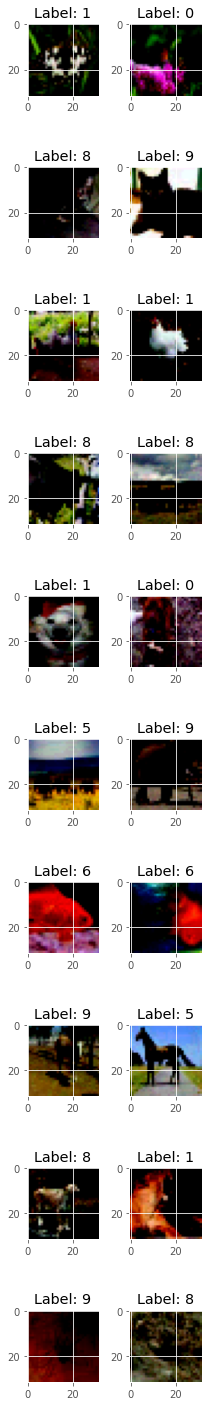

In [85]:
image_samples_adv =  fgsm_attack(   yourmodel.model, image_samples, label_samples,
                                    epsilon=EPSILON, 
                                    clip_value_min=0., 
                                    clip_value_max=1.0, 
                                    soft_label=False,
                                    from_logits=False)

label_sample_adv = yourmodel.predict(image_samples_adv)
# label_sample_adv = np.argmax(yourmodel.model(image_samples_adv).numpy(), 1)

# print(image_samples_adv.shape)
# print(label_sample_adv.shape)

print("---------------------")
test_adv_acc = accuracy_score(label_samples, label_sample_adv, normalize=True)
print(f"test_adv_acc: {test_adv_acc}")
print("---------------------")
plot_image_grid(nb_classes, samples_per_class, image_samples_adv.numpy(), label_sample_adv, (32,32, 3))



#### PGD attack

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


---------------------
test_adv_acc: 0.35
---------------------
image.shape: (20, 32, 32, 3)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


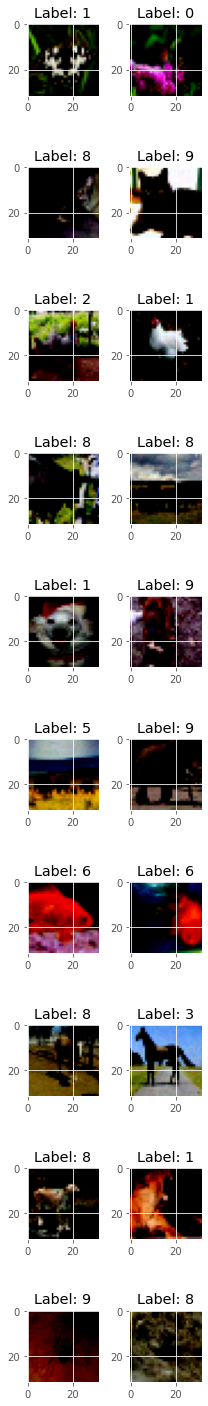

In [88]:
# image_samples_adv = pgd_attack(yourmodel.model, image_samples, label_samples, EPSILON, 20, 0.01, 0.0, 1.0, from_logits=False)
image_samples_adv = pgd_attack(yourmodel.model, image_samples, label_samples, 
                               epsilon=EPSILON, num_steps=K,  step_size=ETA, 
                               soft_label=True,
                               clip_value_min=0.0, clip_value_max=255.0, 
                               from_logits=False)

label_sample_adv = yourmodel.predict(image_samples_adv)


print("---------------------")
test_adv_acc = accuracy_score(label_samples, label_sample_adv, normalize=True)
print(f"test_adv_acc: {test_adv_acc}")
print("---------------------")
plot_image_grid(nb_classes, samples_per_class, image_samples_adv.numpy(), label_sample_adv, (32,32, 3))



#### MIM attack

---------------------
test_adv_acc: 0.25
---------------------
image.shape: (20, 32, 32, 3)


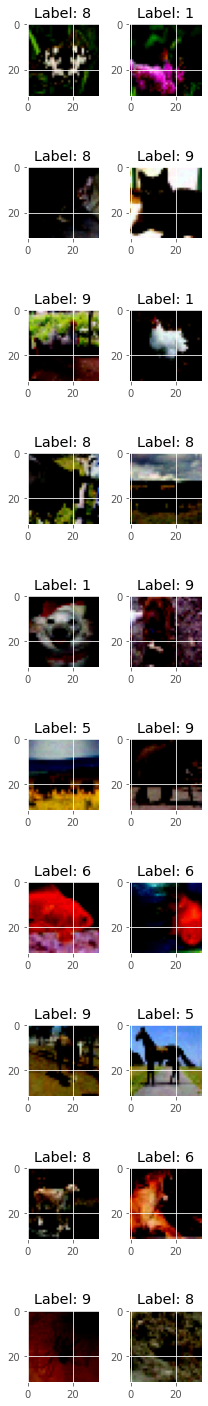

In [89]:

image_samples_adv = mim_attack( yourmodel.model, image_samples, label_samples,
                                epsilon=EPSILON, 
                                gamma= 0.9,
                                num_steps=K, 
                                step_size=ETA, 
                                clip_value_min=0., 
                                clip_value_max=1.0, 
                                soft_label=False,
                                from_logits= False)

label_sample_adv = yourmodel.predict(image_samples_adv)


print("---------------------")
test_adv_acc = accuracy_score(label_samples, label_sample_adv, normalize=True)
print(f"test_adv_acc: {test_adv_acc}")
print("---------------------")
plot_image_grid(nb_classes, samples_per_class, image_samples_adv.numpy(), label_sample_adv, (32,32, 3))






<span style="color:red">**Question 3.9**</span> **Train a robust model using adversarial training with PGD ${\epsilon= 0.0313, k=10, \eta= 0.002}$. Write the code for the adversarial training and report the robust accuracies. After finishing the training, you need to store your best robust model in the folder `./models` and load the model to evaluate the robust accuracies for PGD, MIM, and FGSM attacks with $\epsilon= 0.0313, k=20, \eta= 0.002$ on the testing set.**
   
<div style="text-align: right"> <span style="color:red">[5 points]</span> </div>

### **NOTE: i didnt save it inside ./models, but saved it inside /q3models/q3.9/reinforced_model , because i saved a lot of models hence why i did this.**

---
### My Discussion

After the adversarial training, we have previously achieved 15% accuracy when using PGD attacks onto our model that has not been reinforced, now we achieve 25% accuracy, which is an improvement of 10%, which is pretty good.


---
### Load the previously trained model from q3.4

as we have discussed before, the model that was found to perform the best was the one without any mix up and data augmentation but tuned in terms of the hyperparameters.

In [29]:
EPSILON = 0.0313
K = 10                  # num_steps
ETA = 0.002             # step size

prev_model = keras.models.load_model("q3models/q3.4") # the best tuned model without mix up or data augmentation
yourmode_defence = YourModel()
yourmode_defence.model = prev_model

# yourmode_defence.model.predict(x_test[:2]) # produces a an array of 10 pred probabilities value (after softmax) 
# yourmode_defence.predict(x_test[:10]) # chooses the index (label) that has highest pred probability


In [30]:
optimizer = tf.optimizers.Adam(learning_rate=ETA)
loss_fn = tf.keras.losses.sparse_categorical_crossentropy

# metrics to track the different accuracies.
train_loss = tf.metrics.Mean(name='train_loss')
test_acc_clean = tf.metrics.SparseCategoricalAccuracy()
test_acc_pgd = tf.metrics.SparseCategoricalAccuracy()

In [31]:
#Insert your code here. You can add more cells if necessary

# import tf.nn.compute_average_loss

def train_step_adv(x, x_adv, y):
    with tf.GradientTape() as tape:
        # NOTE: predict two different images, one is real x and another is x_adv
        # produces a prediction probability array
        prob = yourmode_defence.model(x)
        prob_adv = yourmode_defence.model(x_adv) 
        
        # use pred probs instead of logits
        ce_loss_y = loss_fn(y, prob, from_logits=False) 
        ce_loss_y_adv = loss_fn(y, prob_adv, from_logits=False) 
        
         # calculating the average between predicted real loss VS predicted adversarial loss
        loss = (ce_loss_y  + ce_loss_y_adv)/2 
        
        gradients = tape.gradient(loss, yourmode_defence.model.trainable_variables)
        optimizer.apply_gradients(zip(gradients, yourmode_defence.model.trainable_variables))
    return loss


x_train = data_manager.X_train.astype("float32")
def load_train_batch(batch_size=64):
    # print(f"type(batch_size): {type(batch_size)}")
    train_data = tf.data.Dataset.from_tensor_slices((x_train, data_manager.y_train))
    train_data = train_data.shuffle(len(x_train))   # randomly shuffle
    train_data = train_data.batch(batch_size=batch_size) # batches the dataset
    return train_data

train_batches = load_train_batch(64)

#### We reinforce the defence model by adversarial examples which are generated by pgd_attack with lower capacity 

training the model to better differentiate adversarial examples using training dataset

${\epsilon= 0.0313, k=10, \eta= 0.002}$

In [32]:
# print(x_train.shape)
# print(data_manager.y_train.shape)

In [33]:
for epoch in range(K):
    # keras like display of progress
    progress_bar_train = tf.keras.utils.Progbar(len(x_train), verbose=2)
    # NOTE: ADVERSARIAL TRAINING
    for (batch_x, batch_y) in train_batches:
       # replace clean example with adversarial example by 10-steps projected_gradient_descent for adversarial training
        batch_x_adv = pgd_attack(yourmode_defence.model, batch_x, batch_y, 
                                 epsilon=EPSILON, num_steps=K, step_size=ETA, 
                                 clip_value_min= 0.0, clip_value_max=1.0,
                                 from_logits = False)
        loss = train_step_adv(batch_x, batch_x_adv, batch_y)
        # print("1 batch")
        
        batch_y_pred = yourmode_defence.model(batch_x)  # y_pred is an array of discrete labels
        
        # accuracy and loss    
        test_acc_clean(batch_y, batch_y_pred)
        train_loss(loss)
        progress_bar_train.add(batch_x.shape[0], values=[('loss', train_loss.result()), ("acc (%)", test_acc_clean.result() * 100)])


# LAST EPOCH: 4000/4000 - 94s - loss: 0.6062 - acc (%): 94.4209


KeyboardInterrupt: 

In [ ]:
# saving the model
yourmode_defence.model.save("q3models/q3.9/reinforced_model", save_format="tf")

####  evaluate the defence model with the same pgd_attack but higher attack capacity (e.g., num_steps=20)
$\epsilon= 0.0313, k=20, \eta= 0.002$ 

In [35]:
EPSILON = 0.0313
K = 20 # num_steps
ETA = 0.002 # step size

# batching the test data
test_batches = load_test_batch(32)

# load previously trained reinforced model
yourmode_defence = YourModel()
yourmode_defence.model = keras.models.load_model("q3models/q3.9/reinforced_model")



type(batch_size): <class 'int'>


In [40]:
y_adv = []
y_true = []
# generating the adversarial samples from the testing set
for X_batch, y_batch in test_batches:
    X_batch_adv = pgd_attack(yourmode_defence.model, X_batch, y_batch, 
                             EPSILON, K, ETA, 0.0, 1.0, 
                             from_logits=False)
    y_batch_adv = np.argmax(yourmode_defence.model(X_batch_adv).numpy(), 1)
    
    print(y_batch_adv)
    print(y_batch_adv[0])
    print(y_batch.numpy())
    print(y_batch.numpy()[0])

    # compile every true label and adversarial label
    for label in y_batch_adv:
        y_adv.append(label)
    for label in y_batch.numpy():
        y_true.append(label)


[3 3 7 9 8 2 8 3 8 2 3 8 3 7 2 3 3 9 6 2 5 7 1 3 6 9 0 4 3 8 4 4]
3
[7 5 7 1 0 0 1 4 9 2 8 1 8 3 2 7 7 8 6 3 2 7 4 3 6 0 4 5 3 8 5 6]
7
[0 8 2 6 1 5 1 1 7 4 5 3 9 3 0 6 8 8 3 4 1 1 7 1 8 7 1 5 5 3 6 3]
0
[0 5 3 6 2 6 8 5 2 0 5 7 7 7 7 6 0 4 9 6 9 4 7 0 9 5 7 8 8 8 6 8]
0
[5 4 1 1 7 1 4 6 4 5 9 1 3 9 3 2 3 5 2 7 4 4 4 5 8 1 4 1 6 9 5 5]
5
[1 0 8 0 5 4 3 7 1 5 8 4 5 8 3 0 8 3 2 8 1 1 4 1 3 5 1 1 1 5 4 8]
1
[8 3 5 2 5 6 4 2 1 9 2 7 3 3 0 8 9 8 9 4 3 3 4 0 6 2 5 4 1 3 2 5]
8
[9 3 7 2 9 6 8 2 2 6 0 5 3 4 0 7 0 8 5 1 5 2 3 0 6 7 7 7 0 3 6 1]
9
[8 9 3 2 9 3 7 0 9 7 8 6 3 5 9 4 8 3 3 3 7 7 6 3 7 6 9 5 1 9 2 7]
8
[2 5 1 2 2 3 3 1 2 7 9 6 8 7 3 6 9 8 1 7 3 7 9 3 5 6 9 5 9 0 2 7]
2
[2 7 6 0 6 2 0 4 8 5 6 9 0 6 6 5 7 8 4 8 4 7 4 0 1 4 6 8 9 4 4 3]
2
[1 7 6 9 0 2 7 1 6 4 6 5 6 4 6 4 3 1 3 9 3 5 2 0 1 9 6 5 7 8 1 4]
1
[0 8 2 3 3 4 9 1 9 8 9 6 1 2 6 4 9 5 1 5 9 8 9 4 0 4 8 2 6 8 4 3]
0
[2 5 2 3 5 1 8 4 9 8 9 8 8 4 6 5 8 8 1 4 1 4 0 7 8 0 0 2 2 0 1 5]
2
[3 9 0 8 5 3 8 0 5 8 5 4 6 5 6 6 1 1 2 3 8 1 5 9

In [42]:

# accuracy score test on batches
test_adv_acc = accuracy_score(y_true, y_adv)
print("Test adv accuracy:{}".format(test_adv_acc))

Test adv accuracy:0.25


In [43]:
image_samples_adv = pgd_attack( yourmode_defence.model, image_samples, label_samples, 
                                EPSILON, K, ETA, 
                                0.0, 1.0, 
                                from_logits=False )

label_sample_adv = np.argmax(yourmode_defence.model(image_samples_adv).numpy(), 1)

image.shape: (20, 32, 32, 3)


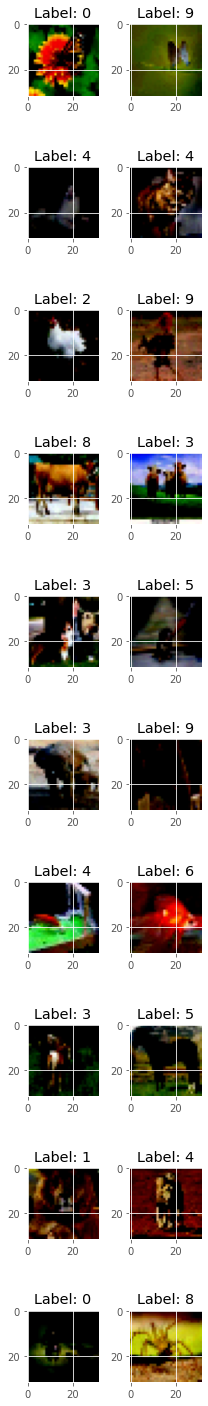

In [44]:
plot_image_grid(nb_classes, samples_per_class, image_samples_adv.numpy(), label_sample_adv, (32,32,3))

The following is an exploring question with bonus points. It is great if you try to do this question, but it is **totally optional**. In this question, we will investigate a recent SOTA technique to improve the generalization ability of deep nets named *Sharpness-Aware Minimization (SAM)* ([link to the main paper](https://openreview.net/pdf?id=6Tm1mposlrM)).  Furthermore, SAM is simple and efficient technique, but roughly doubles the training time due to its required computation. If you have an idea to improve SAM, it would be a great paper to top-tier venues in machine learning and computer vision. Highly recommend to give it a try. 

<span style="color:red">**Question 3.10**</span> (**additionally exploring question**) Read the SAM paper ([link to the main paper](https://openreview.net/pdf?id=6Tm1mposlrM)). Try to apply this techique to the best obtained model and report the results. For the purpose of implementating SAM, we can flexibly add more cells and extensions to the `model.py` file.

<div style="text-align: right"> <span style="color:red">[5 points]</span> </div>

In [ ]:
#Insert your code here. You can add more cells if necessary







--- 
**<div style="text-align: center"> <span style="color:black">END OF ASSIGNMENT</span> </div>**
**<div style="text-align: center"> <span style="color:black">GOOD LUCK WITH YOUR ASSIGNMENT 1!</span> </div>**